In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
from matplotlib.dates import DateFormatter
import warnings; warnings.filterwarnings("ignore")
from matplotlib import dates as mdates
from scipy import stats
import xarray as xr
import cartopy.crs as ccrs
from pylab import *
import random

In [2]:
# Read in the data file which is currently stored on Becky's Cindylou server in Ursula Jongebloed's folder
# You'll have to change this to your folder when you are working with these data
sulfate_samples = pd.read_excel('./ice_core_data/greenland_sulfate_samples.xls')
patris_data = pd.read_csv('./ice_core_data/PatrisDatasimple.csv')
mainfig = pd.read_excel('./ice_core_data/Main_Fig_Data.xlsx')
sulfate_samples

startdate                                            rawfile        mat  \
0        200221  200221_SO2_Cryofocus_Automated_Testing_LowFlow...      baso4   
1        200221  200221_SO2_Cryofocus_Automated_Testing_LowFlow...      baso4   
2        200221  200221_SO2_Cryofocus_Automated_Testing_LowFlow...      baso4   
3        200221  200221_SO2_Cryofocus_Automated_Testing_LowFlow...      baso4   
4        200221  200221_SO2_Cryofocus_Automated_Testing_LowFlow...      baso4   
...         ...                                                ...        ...   
1867     210108                210108_SO2_LargeProcessStdsONLY.csv     na2so4   
1868     210108                210108_SO2_LargeProcessStdsONLY.csv  empty_tin   
1869     210108                210108_SO2_LargeProcessStdsONLY.csv     na2so4   
1870     210108                210108_SO2_LargeProcessStdsONLY.csv  empty_tin   
1871     210108                210108_SO2_LargeProcessStdsONLY.csv     na2so4   

         Sqty      sn   rpb     rps    rpw   rph      rpa  ...  Sample_length  \
0     12.2286  107657   4.0   404.6  193.7  3060  310.123  ...            NaN   
1     21.7092  107658   9.3   404.8  196.3  3125  315.495  ...            NaN   
2     24.8694  107659  12.9   405.0  196.7  3083  312.034  ...            NaN   
3     20.6100  107660  12.2   405.0  199.8  3085  312.167  ...            NaN   
4      7.9692  107661   5.7   405.0  188.3  2898  292.868  ...            NaN   
...       ...     ...   ...     ...    ...   ...      ...  ...            ...   
1867  66.3610  110565   4.4  1001.7  177.9  2551  257.358  ...            NaN   
1868      NaN  110566   5.7  1001.7  185.4  2566  257.831  ...            NaN   
1869  98.1870  110567   4.2  1001.7  176.8  2569  257.807  ...            NaN   
1870      NaN  110568   6.2  1001.7  173.9  2566  257.929  ...            NaN   
1871  69.0700  110569   4.3  1001.7  176.8  2560  257.987  ...            NaN   

      first_year  sulfate  sodium  chlorine  nitrate  ammonium potassium  \
0            NaN      NaN     NaN       NaN      NaN       NaN       NaN   
1            NaN      NaN     NaN       NaN      NaN       NaN       NaN   
2            NaN      NaN     NaN       NaN      NaN       NaN       NaN   
3            NaN      NaN     NaN       NaN      NaN       NaN       NaN   
4            NaN      NaN     NaN       NaN      NaN       NaN       NaN   
...          ...      ...     ...       ...      ...       ...       ...   
1867         NaN      NaN     NaN       NaN      NaN       NaN       NaN   
1868         NaN      NaN     NaN       NaN      NaN       NaN       NaN   
1869         NaN      NaN     NaN       NaN      NaN       NaN       NaN   
1870         NaN      NaN     NaN       NaN      NaN       NaN       NaN   
1871         NaN      NaN     NaN       NaN      NaN       NaN       NaN   

     magnesium  calcium  
0          NaN      NaN  
1          NaN      NaN  
2          NaN      NaN  
3          NaN      NaN  
4          NaN      NaN  
...        ...      ...  
1867       NaN      NaN  
1868       NaN      NaN  
1869       NaN      NaN  
1870       NaN      NaN  
1871       NaN      NaN  

[1872 rows x 30 columns]

In [3]:
# Dropping sample 36 because the d34S values is four standard deviations above mean preindustrial measurement
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.sample_no==36].index)
#Jihong says this is contaminated
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1819].index)
# This sample is creating weird results, might add back in later
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1864].index)
# Based on reviewer comments, dropping 1229, 1253, 1272, 1292, 1342, 1345, 1461, 1638, and 1822
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1229].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1253].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1272].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1292].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1342].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1345].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1461].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1638].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1822].index)
sulfate_samples = sulfate_samples.drop(sulfate_samples[sulfate_samples.first_year==1864].index)

index2 = pd.Series(np.arange(0,1857,1))
sulfate_samples = sulfate_samples.set_index(index2)

In [4]:
# Define all of the sample variables that are in the dataset

# first standards: baso4, ag2s, zns, na2so4
baso4_all = sulfate_samples[sulfate_samples.mat=='baso4']
baso4_gdi = baso4_all.where(baso4_all.flag==1)
baso4_bdi = baso4_all.where(baso4_all.flag==0)

ag2s_all = sulfate_samples[sulfate_samples.mat=='ag2s']
ag2s_gdi = ag2s_all.where(ag2s_all.flag==1)
ag2s_bdi = ag2s_all.where(ag2s_all.flag==0)

zns_all = sulfate_samples[sulfate_samples.mat=='zns']
zns_gdi = zns_all.where(zns_all.flag==1)
zns_bdi = zns_all.where(zns_all.flag==0)

na2so4_all = sulfate_samples[sulfate_samples.mat=='na2so4']
na2so4_gdi = na2so4_all.where(na2so4_all.flag==1)
na2so4_bdi = na2so4_all.where(na2so4_all.flag==0)

# IAEA standards

iaeas1_all = sulfate_samples[sulfate_samples.mat=='IAEA-S-1']
iaeas1_good = iaeas1_all.where(iaeas1_all.flag==1)
iaeas1_bad = iaeas1_all.where(iaeas1_all.flag==0)

iaeas2_all = sulfate_samples[sulfate_samples.mat=='IAEA-S-2']
iaeas2_good = iaeas2_all.where(iaeas2_all.flag==1)
iaeas2_bad = iaeas2_all.where(iaeas2_all.flag==0)

iaeas3_all = sulfate_samples[sulfate_samples.mat=='IAEA-S-3']
iaeas3_good = iaeas3_all.where(iaeas3_all.flag==1)
iaeas3_bad = iaeas3_all.where(iaeas3_all.flag==0)

iaeas4_all = sulfate_samples[sulfate_samples.mat=='IAEA-S-4']
iaeas4_good = iaeas4_all.where(iaeas4_all.flag==1)
iaeas4_bad = iaeas4_all.where(iaeas4_all.flag==0)

iaeas5_all = sulfate_samples[sulfate_samples.mat=='IAEA-S-5']
iaeas5_good = iaeas5_all.where(iaeas5_all.flag==1)
iaeas5_bad = iaeas5_all.where(iaeas5_all.flag==0)

iaeas6_all = sulfate_samples[sulfate_samples.mat=='IAEA-S-6']
iaeas6_good = iaeas6_all.where(iaeas6_all.flag==1)
iaeas6_bad = iaeas6_all.where(iaeas6_all.flag==0)

nbs127_all = sulfate_samples[sulfate_samples.mat=='NBS_127']
nbs127_good = nbs127_all.where(nbs127_all.flag==1)
nbs127_bad = nbs127_all.where(nbs127_all.flag==0)

# empty tins, process standards, and process blanks
empty_tin_all = sulfate_samples[sulfate_samples.mat=='empty_tin']
empty_tin_gdi = empty_tin_all.where(empty_tin_all.flag==1)
empty_tin_bdi = empty_tin_all.where(empty_tin_all.flag==0)

empty_quartz_filter = sulfate_samples[sulfate_samples.mat=='empty_quartz_filter'].where(sulfate_samples.flag==1)
process_std = sulfate_samples[sulfate_samples.mat=='process_std'].where(sulfate_samples.flag==1)
process_blk = sulfate_samples[sulfate_samples.mat=='process_blk'].where(sulfate_samples.flag==1)
process_blk_wib  = sulfate_samples[sulfate_samples.mat=='process_blk'].where(sulfate_samples.flag==1)
process_blk_fict = sulfate_samples[sulfate_samples.mat=='process_blk'].where(sulfate_samples.flag==1)

# ice core samples
ice_core_sample_with_cont = sulfate_samples[sulfate_samples.mat=='ice_core_sample']
ice_core_sample = ice_core_sample_with_cont.loc[ice_core_sample_with_cont.first_year!=1652] #eliminate contaminated sample
ice_year = ice_core_sample['first_year']
ice_core_sample_old = ice_core_sample.where(ice_year < 1600)
ice_core_sample_pre = ice_core_sample.where(ice_year < 1850)
ice_core_sample_ind = ice_core_sample.where(ice_year > 1850)
duplicates = ice_core_sample.where(ice_core_sample.flag==2)

recent_run_date = sulfate_samples.startdate[np.shape(sulfate_samples)[0]-1]
recent_run = sulfate_samples[sulfate_samples.startdate==recent_run_date]

patris_preindustrial = patris_data[patris_data.MeanDate<1850]
patris_industrial = patris_data[patris_data.MeanDate>1850]

In [5]:
# define functions to calculate normalized peak area (npa), sample yield, and predicted S quantity (pSqty)
def npa(data):
    nparea = data['spa']*np.mean(sulfate_samples['rpa'])/data['rpa']
    return nparea

def nan_npa(data):
    data = data[data.Sqty>0]
    nparea = data['spa']*np.mean(sulfate_samples['rpa'])/data['rpa']
    return nparea

def sample_yield(data):
    sampyield = npa(data)/data['Sqty']
    return sampyield

def pSqty(data,slope):
    predSqty = npa(data)/slope
    return predSqty

In [6]:
# first calculate stats for all standards individually
s_baso4, i_baso4, r_baso4, p_baso4, stderr_baso4      = stats.linregress(baso4_gdi.Sqty[baso4_gdi.Sqty>0],
                                                                    nan_npa(baso4_gdi))
s_ag2s, i_ag2s, r_ag2s, p_ag2s, stderr_ag2s           = stats.linregress(ag2s_gdi.Sqty[ag2s_gdi.Sqty>0],
                                                                    nan_npa(ag2s_gdi))
s_zns, i_zns, r_zns, p_zns, stderr_zns                = stats.linregress(zns_gdi.Sqty[zns_gdi.Sqty>0],
                                                                    nan_npa(zns_gdi))
s_na2so4, i_na2so4, r_na2so4, p_na2so4, stderr_na2so4 = stats.linregress(na2so4_gdi.Sqty[na2so4_gdi.Sqty>0],
                                                                    nan_npa(na2so4_gdi))
s_process_std, i_process_std, r_process_std, p_process_std, stderr_process_std = stats.linregress(process_std.Sqty[process_std.Sqty>0],
                                                                    nan_npa(process_std))

# next calculate stats for all standards combined
all_Sqty = np.hstack([baso4_gdi.Sqty[baso4_gdi.Sqty>0],ag2s_gdi.Sqty[ag2s_gdi.Sqty>0],zns_gdi.Sqty[zns_gdi.Sqty>0],na2so4_gdi.Sqty[na2so4_gdi.Sqty>0]])
all_npa = np.hstack([nan_npa(baso4_gdi),nan_npa(ag2s_gdi),nan_npa(zns_gdi),nan_npa(na2so4_gdi)])
s_all, i_all, r_all, p_all, stderr_all = stats.linregress(all_Sqty, all_npa)

# now create y values for best fit lines
baso4_pred= baso4_gdi['Sqty']*s_baso4+i_baso4
ag2s_pred   = ag2s_gdi['Sqty']*s_ag2s+i_ag2s
zns_pred    = zns_gdi['Sqty']*s_zns+i_zns
na2so4_pred = na2so4_gdi['Sqty']*s_na2so4+i_na2so4

In [7]:
Sqty_d34S_std_ag2s = np.array([np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)<1].d34S.values),
                               np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)>1].loc[pSqty(ag2s_gdi,s_ag2s)<=2].d34S.values),
                               np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)>2].loc[pSqty(ag2s_gdi,s_ag2s)<=4].d34S.values),
                               np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)>4].loc[pSqty(ag2s_gdi,s_ag2s)<=6].d34S.values),
                               np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)>6].loc[pSqty(ag2s_gdi,s_ag2s)<=8].d34S.values),
                               np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)>8].loc[pSqty(ag2s_gdi,s_ag2s)<=10].d34S.values),
                               np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)>10].loc[pSqty(ag2s_gdi,s_ag2s)<=14].d34S.values),
                               np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)>14].loc[pSqty(ag2s_gdi,s_ag2s)<=20].d34S.values),
                               np.std(ag2s_gdi.loc[pSqty(ag2s_gdi,s_ag2s)>20].d34S.values)])

Sqty_d34S_std_baso4 = np.array([np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)<1].d34S.values),
                               np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)>1].loc[pSqty(baso4_gdi,s_baso4)<=2].d34S.values),
                               np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)>2].loc[pSqty(baso4_gdi,s_baso4)<=4].d34S.values),
                               np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)>4].loc[pSqty(baso4_gdi,s_baso4)<=6].d34S.values),
                               np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)>6].loc[pSqty(baso4_gdi,s_baso4)<=8].d34S.values),
                               np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)>8].loc[pSqty(baso4_gdi,s_baso4)<=10].d34S.values),
                               np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)>10].loc[pSqty(baso4_gdi,s_baso4)<=14].d34S.values),
                               np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)>14].loc[pSqty(baso4_gdi,s_baso4)<=20].d34S.values),
                               np.std(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)>20].d34S.values)])

Sqty_d34S_std_zns = np.array([np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)<1].d34S.values),
                               np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)>1].loc[pSqty(zns_gdi,s_zns)<=2].d34S.values),
                               np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)>2].loc[pSqty(zns_gdi,s_zns)<=4].d34S.values),
                               np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)>4].loc[pSqty(zns_gdi,s_zns)<=6].d34S.values),
                               np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)>6].loc[pSqty(zns_gdi,s_zns)<=8].d34S.values),
                               np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)>8].loc[pSqty(zns_gdi,s_zns)<=10].d34S.values),
                               np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)>10].loc[pSqty(zns_gdi,s_zns)<=14].d34S.values),
                               np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)>14].loc[pSqty(zns_gdi,s_zns)<=20].d34S.values),
                               np.std(zns_gdi.loc[pSqty(zns_gdi,s_zns)>20].d34S.values)])

Sqty_d34S_std_na2so4 = np.array([np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)<1].d34S.values),
                               np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)>1].loc[pSqty(na2so4_gdi,s_na2so4)<=2].d34S.values),
                               np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)>2].loc[pSqty(na2so4_gdi,s_na2so4)<=4].d34S.values),
                               np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)>4].loc[pSqty(na2so4_gdi,s_na2so4)<=6].d34S.values),
                               np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)>6].loc[pSqty(na2so4_gdi,s_na2so4)<=8].d34S.values),
                               np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)>8].loc[pSqty(na2so4_gdi,s_na2so4)<=10].d34S.values),
                               np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)>10].loc[pSqty(na2so4_gdi,s_na2so4)<=14].d34S.values),
                               np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)>14].loc[pSqty(na2so4_gdi,s_na2so4)<=20].d34S.values),
                               np.std(na2so4_gdi.loc[pSqty(na2so4_gdi,s_na2so4)>20].d34S.values)])

Sqty_d34S_std_process_std = np.array([np.std(process_std.loc[pSqty(process_std,s_process_std)<1].d34S.values),
                               np.std(process_std.loc[pSqty(process_std,s_all)>1].loc[pSqty(process_std,s_all)<=2].d34S.values),
                               np.std(process_std.loc[pSqty(process_std,s_all)>2].loc[pSqty(process_std,s_all)<=4].d34S.values),
                               np.std(process_std.loc[pSqty(process_std,s_all)>4].loc[pSqty(process_std,s_all)<=6].d34S.values),
                               np.std(process_std.loc[pSqty(process_std,s_all)>6].loc[pSqty(process_std,s_all)<=8].d34S.values),
                               np.std(process_std.loc[pSqty(process_std,s_all)>8].loc[pSqty(process_std,s_all)<=10].d34S.values),
                               np.std(process_std.loc[pSqty(process_std,s_all)>10].loc[pSqty(process_std,s_all)<=14].d34S.values),
                               np.std(process_std.loc[pSqty(process_std,s_all)>14].loc[pSqty(process_std,s_all)<=20].d34S.values),
                               np.std(process_std.loc[pSqty(process_std,s_all)>20].d34S.values)])


In [8]:
Sqty_d34S_std_process_size = np.array([np.shape(process_std.loc[pSqty(process_std,s_process_std)<1])[0],
                               np.shape(process_std.loc[pSqty(process_std,s_all)>1].loc[pSqty(process_std,s_all)<=2])[0],
                               np.shape(process_std.loc[pSqty(process_std,s_all)>2].loc[pSqty(process_std,s_all)<=4])[0],
                               np.shape(process_std.loc[pSqty(process_std,s_all)>4].loc[pSqty(process_std,s_all)<=6])[0],
                               np.shape(process_std.loc[pSqty(process_std,s_all)>6].loc[pSqty(process_std,s_all)<=8])[0],
                               np.shape(process_std.loc[pSqty(process_std,s_all)>8].loc[pSqty(process_std,s_all)<=10])[0],
                               np.shape(process_std.loc[pSqty(process_std,s_all)>10].loc[pSqty(process_std,s_all)<=14])[0],
                               np.shape(process_std.loc[pSqty(process_std,s_all)>14].loc[pSqty(process_std,s_all)<=20])[0],
                               np.shape(process_std.loc[pSqty(process_std,s_all)>20])[1]])


In [9]:
print('the number of process standards in each size range is ', Sqty_d34S_std_process_size)
print('The order is 0-1, 1-2, 2-4, 4-6, 6-8, 8-10, 10-14, 14-20, >20' )

the number of process standards in each size range is  [ 0  0 10 15 17 12 17 20 30]
The order is 0-1, 1-2, 2-4, 4-6, 6-8, 8-10, 10-14, 14-20, >20


In [10]:
np.set_printoptions(precision=2)
print('The error associated with each of process standard size range is ',Sqty_d34S_std_process_std)


The error associated with each of process standard size range is  [ nan  nan 0.46 0.64 0.47 0.15 0.33 0.43 0.45]


In [11]:
avg_error = np.nansum(Sqty_d34S_std_process_size*Sqty_d34S_std_process_std)/np.nansum(Sqty_d34S_std_process_size)
print('The mean error associated with all process standards is',avg_error)

The mean error associated with all process standards is 0.427514638936179


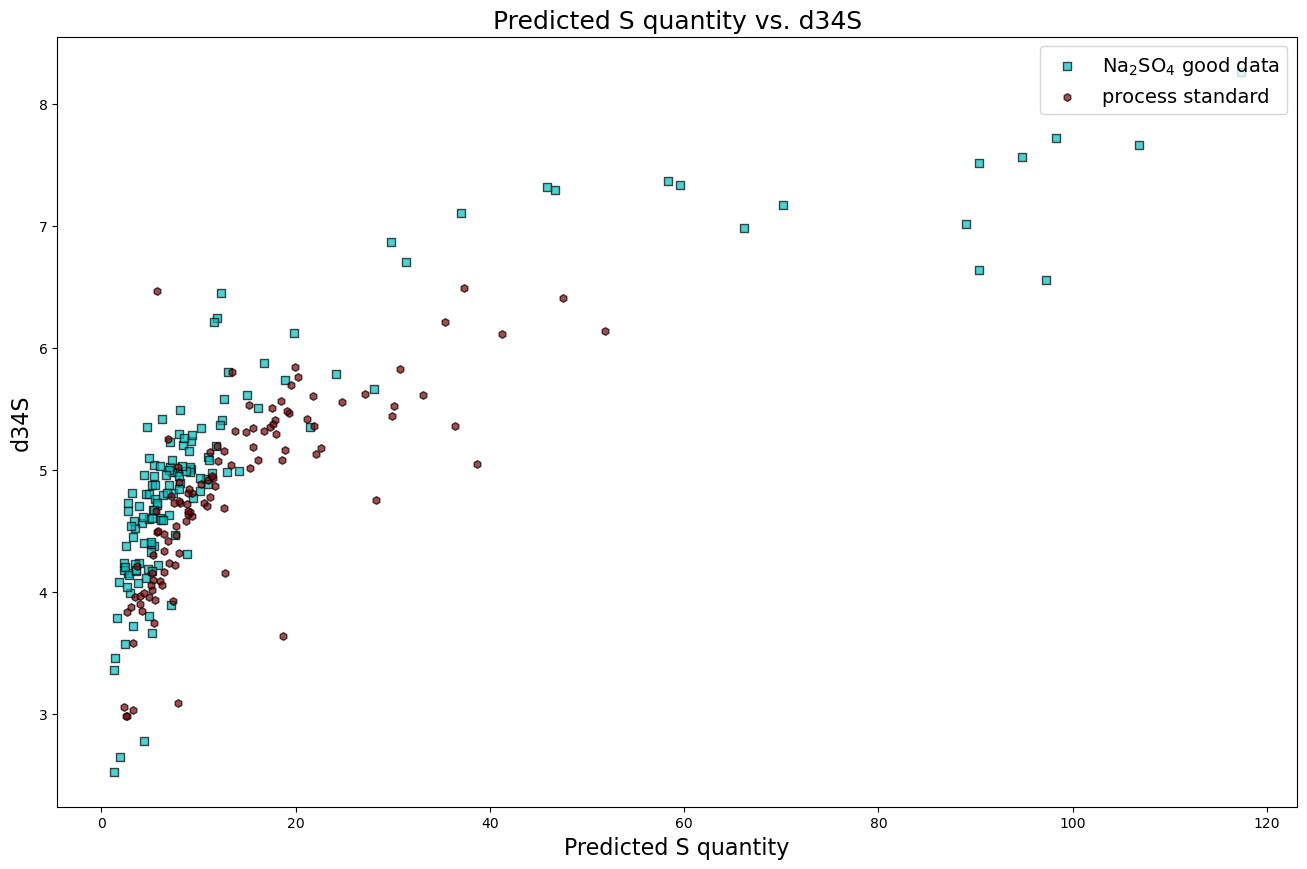

In [12]:
# FIGURE 4: d34S vs predicted S quantity
fig = plt. figure(figsize = [16,10])
plt.ylabel('d34S',fontsize=16)
plt.xlabel('Predicted S quantity',fontsize=16)
plt.title('Predicted S quantity vs. d34S',fontsize = 18)
plt.scatter(pSqty(na2so4_gdi,s_na2so4),na2so4_gdi.d34S,marker='s',color='c',edgecolors='k',s=30,label ='Na$_2$SO$_4$ good data',alpha=0.7)
plt.scatter(pSqty(process_std,s_all),process_std.d34S,marker='h',color='maroon',edgecolors='k',s=30,label ='process standard',alpha=0.7)
# plt.scatter(pSqty(process_std,s_all),d34S_VCDT[process_std.index],marker='h',color='black',edgecolors='k',s=30,label ='process standard',alpha=0.7)
# plt.scatter(pSqty(na2so4_gdi,s_all),d34S_VCDT[na2so4_gdi.index],marker='h',color='orange',edgecolors='k',s=30,label ='process standard',alpha=0.7)
# plt.scatter(pSqty(ice_core_sample,s_process_std),ice_core_sample.d34S,marker='h',color='g',edgecolors='k',s=bdims,label ='ice core sample',alpha=0.7)
plt.legend(loc='upper right',fontsize=14)

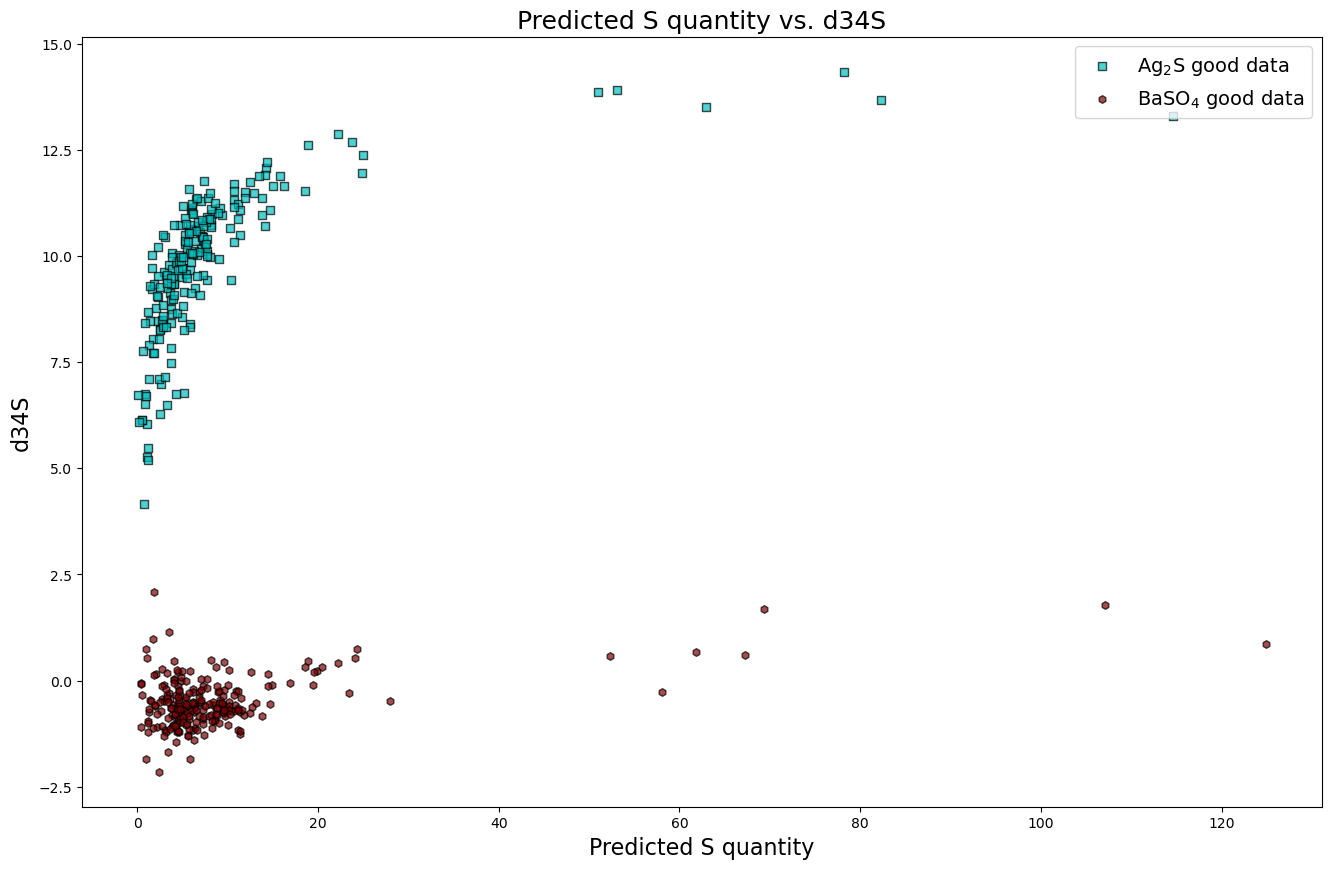

In [13]:
# FIGURE 4: d34S vs predicted S quantity
fig = plt. figure(figsize = [16,10])
plt.ylabel('d34S',fontsize=16)
plt.xlabel('Predicted S quantity',fontsize=16)
plt.title('Predicted S quantity vs. d34S',fontsize = 18)
plt.scatter(pSqty(ag2s_gdi,s_all),ag2s_gdi.d34S,marker='s',color='c',edgecolors='k',s=30,label ='Ag$_2$S good data',alpha=0.7)
plt.scatter(pSqty(baso4_gdi,s_all),baso4_gdi.d34S,marker='h',color='maroon',edgecolors='k',s=30,label ='BaSO$_4$ good data',alpha=0.7)
# plt.scatter(pSqty(process_std,s_all),d34S_VCDT[process_std.index],marker='h',color='black',edgecolors='k',s=30,label ='process standard',alpha=0.7)
# plt.scatter(pSqty(na2so4_gdi,s_all),d34S_VCDT[na2so4_gdi.index],marker='h',color='orange',edgecolors='k',s=30,label ='process standard',alpha=0.7)
# plt.scatter(pSqty(ice_core_sample,s_process_std),ice_core_sample.d34S,marker='h',color='g',edgecolors='k',s=bdims,label ='ice core sample',alpha=0.7)
plt.legend(loc='upper right',fontsize=14)

In [14]:
measurement_error = np.zeros(len(ice_core_sample)) # create an empty array to store the measurement error
ice_year = ice_core_sample.first_year

# I CHANGED THIS TO ALL BE SQTY_D34S_PROCESS_STD[7] TO MAXIMIZE THE ERROR
for i in range(0,len(ice_core_sample)): # loop through all the ice core samples and assign an error based on pSqty
    if pSqty(ice_core_sample.iloc[[i]],s_all).values<=1:
        measurement_error[i] = Sqty_d34S_std_process_std[7]
    elif pSqty(ice_core_sample.iloc[[i]],s_all).values>1 and pSqty(ice_core_sample.iloc[[i]],s_all).values<=2:
        measurement_error[i] = Sqty_d34S_std_process_std[7]
    elif pSqty(ice_core_sample.iloc[[i]],s_all).values>2 and pSqty(ice_core_sample.iloc[[i]],s_all).values<=4:
        measurement_error[i] = Sqty_d34S_std_process_std[7]
    elif pSqty(ice_core_sample.iloc[[i]],s_all).values>4 and pSqty(ice_core_sample.iloc[[i]],s_all).values<=6:
        measurement_error[i] = Sqty_d34S_std_process_std[7]
    elif pSqty(ice_core_sample.iloc[[i]],s_all).values>6 and pSqty(ice_core_sample.iloc[[i]],s_all).values<=8:
        measurement_error[i] = Sqty_d34S_std_process_std[7]
    elif pSqty(ice_core_sample.iloc[[i]],s_all).values>8 and pSqty(ice_core_sample.iloc[[i]],s_all).values<=10:
        measurement_error[i] = Sqty_d34S_std_process_std[7]
    elif pSqty(ice_core_sample.iloc[[i]],s_all).values>10 and pSqty(ice_core_sample.iloc[[i]],s_all).values<=14:
        measurement_error[i] = Sqty_d34S_std_process_std[7]
    elif pSqty(ice_core_sample.iloc[[i]],s_all).values>14 and pSqty(ice_core_sample.iloc[[i]],s_all).values<=20:
        measurement_error[i] = Sqty_d34S_std_process_std[7]
    elif pSqty(ice_core_sample.iloc[[i]],s_all).values>20:
        measurement_error[i] = Sqty_d34S_std_process_std[7]

# sample_error = measurement_error*1.96 # 95% confidence interval
sample_error = measurement_error*0+avg_error*1.96 # I'm starting to think that I should use average error as a more general error estimate bc I'm not sure that the error varies with size
sample_error_pre = sample_error[ice_year<1750]
sample_error_ind = sample_error[ice_year>1850]
dup_error=sample_error[ice_core_sample.flag==2]

In [15]:
#s_all = 11.0630
# divide ice core samples into bins based on measured sulfur quantity
Sqty_1ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)<1] #making it zero because no ice core samples are of this size
Sqty_2ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)>1].loc[pSqty(sulfate_samples,s_all)<=2]
Sqty_4ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)>2].loc[pSqty(sulfate_samples,s_all)<=4]
Sqty_6ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)>4].loc[pSqty(sulfate_samples,s_all)<=6]
Sqty_8ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)>6].loc[pSqty(sulfate_samples,s_all)<=8]
Sqty_10ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)>8].loc[pSqty(sulfate_samples,s_all)<=10]
Sqty_14ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)>10].loc[pSqty(sulfate_samples,s_all)<=14]
Sqty_20ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)>14].loc[pSqty(sulfate_samples,s_all)<=20]
Sqty_g20ug = sulfate_samples.loc[~np.isnan(sulfate_samples.d34S)].loc[pSqty(sulfate_samples,s_all)>20]

In [16]:
# the s_all that Andy calculated = 11.0630
# I'm not sure what StdsKnwn_d34S is -- I took it from Andy's matlab code StdsKnwn_d34S = [ag2s.d34Sacc;baso4.d34Sacc]
# I plugged in the values for ag2s.d34Sacc and baso4.d34Sacc from the matlab code
StdsKnwn_d34S = np.array([18.1400,5.0900])
StdsMeas_d34S_1ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)<=1].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_baso4)<=1].d34S.values)];
StdsMeas_d34S_2ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)>1].loc[pSqty(ag2s_gdi,s_all)<=2].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_all)>1].loc[pSqty(baso4_gdi,s_all)<=2].d34S.values)];
StdsMeas_d34S_4ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)>2].loc[pSqty(ag2s_gdi,s_all)<=4].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_all)>2].loc[pSqty(baso4_gdi,s_all)<=4].d34S.values)];
StdsMeas_d34S_6ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)>4].loc[pSqty(ag2s_gdi,s_all)<=6].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_all)>4].loc[pSqty(baso4_gdi,s_all)<=6].d34S.values)];
StdsMeas_d34S_8ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)>6].loc[pSqty(ag2s_gdi,s_all)<=8].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_all)>6].loc[pSqty(baso4_gdi,s_all)<=8].d34S.values)];
StdsMeas_d34S_10ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)>8].loc[pSqty(ag2s_gdi,s_all)<=10].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_all)>8].loc[pSqty(baso4_gdi,s_all)<=10].d34S.values)];
StdsMeas_d34S_14ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)>10].loc[pSqty(ag2s_gdi,s_all)<=14].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_all)>10].loc[pSqty(baso4_gdi,s_all)<=14].d34S.values)];
StdsMeas_d34S_20ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)>14].loc[pSqty(ag2s_gdi,s_all)<=20].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_all)>14].loc[pSqty(baso4_gdi,s_all)<=20].d34S.values)];
StdsMeas_d34S_g20ug = [np.mean(ag2s_gdi.loc[pSqty(ag2s_gdi,s_all)>20].d34S.values),np.mean(baso4_gdi.loc[pSqty(baso4_gdi,s_all)>20].d34S.values)];

d34Sfit_1ug = np.polyfit(StdsMeas_d34S_1ug,StdsKnwn_d34S,1)
d34Sfit_2ug = np.polyfit(StdsMeas_d34S_2ug,StdsKnwn_d34S,1)
d34Sfit_4ug = np.polyfit(StdsMeas_d34S_4ug,StdsKnwn_d34S,1)
d34Sfit_6ug = np.polyfit(StdsMeas_d34S_6ug,StdsKnwn_d34S,1)
d34Sfit_8ug = np.polyfit(StdsMeas_d34S_8ug,StdsKnwn_d34S,1)
d34Sfit_10ug = np.polyfit(StdsMeas_d34S_10ug,StdsKnwn_d34S,1)
d34Sfit_14ug = np.polyfit(StdsMeas_d34S_14ug,StdsKnwn_d34S,1)
d34Sfit_20ug = np.polyfit(StdsMeas_d34S_20ug,StdsKnwn_d34S,1)
d34Sfit_g20ug = np.polyfit(StdsMeas_d34S_g20ug,StdsKnwn_d34S,1)

#change starting here

d34S_size_corrected = np.zeros(np.size(~np.isnan(sulfate_samples.d34S)))
d34S_size_corrected[Sqty_1ug.index.values] = d34Sfit_1ug[0]*Sqty_1ug.d34S+d34Sfit_1ug[1]
d34S_size_corrected[Sqty_2ug.index.values] = d34Sfit_2ug[0]*Sqty_2ug.d34S+d34Sfit_2ug[1]
d34S_size_corrected[Sqty_4ug.index.values] = d34Sfit_4ug[0]*Sqty_4ug.d34S+d34Sfit_4ug[1]
d34S_size_corrected[Sqty_6ug.index.values] = d34Sfit_6ug[0]*Sqty_6ug.d34S+d34Sfit_6ug[1]
d34S_size_corrected[Sqty_8ug.index.values] = d34Sfit_8ug[0]*Sqty_8ug.d34S+d34Sfit_8ug[1]
d34S_size_corrected[Sqty_10ug.index.values] = d34Sfit_10ug[0]*Sqty_10ug.d34S+d34Sfit_10ug[1]
d34S_size_corrected[Sqty_14ug.index.values] = d34Sfit_14ug[0]*Sqty_14ug.d34S+d34Sfit_14ug[1]
d34S_size_corrected[Sqty_20ug.index.values] = d34Sfit_20ug[0]*Sqty_20ug.d34S+d34Sfit_20ug[1]
d34S_size_corrected[Sqty_g20ug.index.values] = d34Sfit_g20ug[0]*Sqty_g20ug.d34S+d34Sfit_g20ug[1]

In [17]:
iaea_stdsknwn_d34S = np.array([22.6200,-32.4900,-34.0500,21.1200]) # iaeas2, iaeas3, iaeas6, nbs127 d34S values

iaeas1_d34Sacc = -0.3
iaeas2_d34Sacc = 22.62
iaeas3_d34Sacc = -32.49
iaeas4_d34Sacc = 16.90
iaeas5_d34Sacc = 0.49
iaeas6_d34Sacc = -34.05
nbs127_d34Sacc = 21.12

iaeas1_d34Smeas = d34S_size_corrected[iaeas1_good.index]
iaeas2_d34Smeas = d34S_size_corrected[iaeas2_good.index]
iaeas3_d34Smeas = d34S_size_corrected[iaeas3_good.index]
iaeas4_d34Smeas = d34S_size_corrected[iaeas4_good.index]
iaeas5_d34Smeas = d34S_size_corrected[iaeas5_good.index]
iaeas6_d34Smeas = d34S_size_corrected[iaeas6_good.index]
nbs127_d34Smeas = d34S_size_corrected[nbs127_good.index]

iaea_fit_vals = np.hstack([d34S_size_corrected[iaeas2_good.index],
                              d34S_size_corrected[iaeas3_good.index],
                              d34S_size_corrected[iaeas6_good.index],
                              d34S_size_corrected[nbs127_good.index]]
                            ) # measured standard values mean array

iaea_stdsmeas_d34S = np.array([np.mean(d34S_size_corrected[iaeas2_good.index]),
                              np.mean(d34S_size_corrected[iaeas3_good.index]),
                              np.mean(d34S_size_corrected[iaeas6_good.index]),
                              np.mean(d34S_size_corrected[nbs127_good.index])]
                            ) # measured standard values mean array
iaea_fit = np.polyfit(iaea_stdsmeas_d34S,iaea_stdsknwn_d34S,1) 

# d34S CORRECTED VALUES CALCULATED BELOW
d34S_VCDT = iaea_fit[0]*d34S_size_corrected+iaea_fit[1]

ag2s_d34Sacc = np.mean(d34S_VCDT[ag2s_gdi.index]) # 18.1400 in Andy's code?
baso4_d34Sacc = np.mean(d34S_VCDT[baso4_gdi.index]) #5.0900
zns_d34Sacc = np.mean(d34S_VCDT[zns_gdi.index]) #-33.7400
ag2s_d34Smeas = d34S_VCDT[ag2s_gdi.index]
baso4_d34Smeas = d34S_VCDT[baso4_gdi.index]
zns_d34Smeas = d34S_VCDT[zns_gdi.index]

In [18]:
patris02 = pd.read_csv('./ice_core_data/PatrisDatasimple.csv')
patris02_pi = patris02.loc[patris02.MeanDate<1850]
patris02_pi_nssSO4 = patris02_pi.PatrisnssSO4
patris02_pi_d34S = patris02_pi.d34SnssSO4
patris02_pd = patris02.loc[patris02.MeanDate>1850]
patris02_pd_nssSO4 = patris02_pd.PatrisnssSO4
patris02_pd_d34S = patris02_pd.d34SnssSO4
patris_yr = patris02.MeanDate
patris_d34S_tot = patris02.d34S_tot

# correct Patris data because IAEA-S-2 used to be 21.8 but was corrected to 22.62 after Patris paper was published
patris_VCDT_corr_func = np.polyfit([iaeas1_d34Sacc,21.8,nbs127_d34Sacc],
                                   [iaeas1_d34Sacc,iaeas2_d34Sacc,nbs127_d34Sacc],1)

In [19]:
patris_VCDT_corr_func = np.polyfit([iaeas1_d34Sacc,21.8,nbs127_d34Sacc],
                                   [iaeas1_d34Sacc,iaeas2_d34Sacc,nbs127_d34Sacc],1)
patris_wSSA_d34S_CORR = patris_VCDT_corr_func[0]*patris_d34S_tot+patris_VCDT_corr_func[1]

d34Sss = 21 # d34S of sea salt
patris_fss = 0.25*(patris02.Na)/(patris02.SO4) # calculate the fraction of sea salt in each ice core sample
patris_d34S_CORR = (patris_wSSA_d34S_CORR-d34Sss*patris_fss)/(1-patris_fss)

patris02_pi_d34S = patris_d34S_CORR[patris02.MeanDate<1850]
patris02_pd_d34S = patris_d34S_CORR[patris02.MeanDate>1850]

patris02_pi_nssSO4 = patris02.loc[patris02.MeanDate<1850].PatrisnssSO4
patris02_pd_nssSO4 = patris02.loc[patris02.MeanDate>1850].PatrisnssSO4

In [20]:
# calculate the standard deviation of the process standards after they've been corrected for size and VCDT
process_std_std = np.std(d34S_VCDT[process_std.index])
process_std_std

1.2007042145148112

In [21]:
# Another way of calculating the deviation of the process standards from the mean -- should be the same number as above
np.sqrt(np.sum((d34S_VCDT[process_std.index] - np.mean(d34S_VCDT[process_std.index]))**2/110))

1.211570537489579

In [22]:
# First, add d34S_VCDT to the dataframe and then group by first year to get the mean d34S value for duplicates and triplicates
# nssSO4_forxl = pd.DataFrame(data=ice_core_sample.sulfate*(1-0.25*ice_core_sample.sodium/ice_core_sample.sulfate),index=ice_core_sample.index,columns={'nssSO4'})
VCDT = pd.DataFrame(data=d34S_VCDT[ice_core_sample.index],index=ice_core_sample.index,columns=['d34S_VCDT'])
sample_no = pd.DataFrame(data=ice_core_sample.sample_no,index=ice_core_sample.index,columns=['sample_no'])
# sample_error = pd.DataFrame(data=sample_error, index=ice_core_sample.index,columns={'sample_error'})
ice_core_withdup = pd.concat([ice_core_sample,VCDT],axis=1) # adding a column with VCDT correct values to the end of the ice core data array
ice_core = ice_core_withdup.groupby('first_year').mean() # This command averages the duplicates and triplicates into one sample

In [23]:
# Re-do all of the calculations from above but this time with each duplicate/triplicate represented by one sample instead of 2 or 3
ice_core = ice_core[ice_core.sulfate>3.5]
ice_years = ice_core.index
d34Sss = 21 # d34S of sea salt
fss = 0.25*(ice_core.sodium)/(ice_core.sulfate) # calculate the fraction of sea salt in each ice core sample
d34S = (ice_core.d34S_VCDT-d34Sss*fss)/(1-fss) # correct the d34S VCDT value for sea salt
d34S_prepre = d34S[ice_years<1750] # pre-preindustrial samples
d34S_pre = ((d34S[ice_years<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5] # sulfate conc <60 to eliminate volcanic eruptions
d34S_ind = (d34S[ice_years>1850])
d34S_old = (d34S[ice_years<1750])[ice_core.sulfate[ice_years<1750]<60]

d34S_nssSO4 = pd.DataFrame(data=d34S[ice_core.index],index=ice_core.index,columns=['d34S_nssSO4'])
ice_core = pd.concat([ice_core,d34S_nssSO4],axis=1)

nssSO4=ice_core.sulfate*(1-fss) # sulfate conc <60 to eliminate volcanic eruptions
nssSO4_prepre=nssSO4[nssSO4.index<1750] # pre-preindustrial samples
nssSO4_pre=((nssSO4[nssSO4.index<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5]
nssSO4_ind=((ice_core.sulfate*(1-fss))[ice_years>1850])

In [24]:
np.min(d34S)

3.6479898700015587

In [25]:
Cl_pre = ((ice_core.chlorine[nssSO4.index<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5]
Cl_ind = ice_core.chlorine[ice_years>1850]

NO3_pre = ((ice_core.nitrate[nssSO4.index<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5]
NO3_ind = ice_core.nitrate[ice_years>1850]

NH4_pre = ((ice_core.ammonium[nssSO4.index<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5]
NH4_ind = ice_core.ammonium[ice_years>1850]

K_pre = ((ice_core.potassium[nssSO4.index<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5]
K_ind = ice_core.potassium[ice_years>1850]

Mg_pre = ((ice_core.magnesium[nssSO4.index<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5]
Mg_ind = ice_core.magnesium[ice_years>1850]

Ca_pre = ((ice_core.calcium[nssSO4.index<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5]
Ca_ind = ice_core.calcium[ice_years>1850]

In [26]:
Jihong = pd.read_excel('./ice_core_data/Jihong_d34S_volc.xlsx')
Jihong_sulfate = Jihong.avg_SO4[:6]
Jihong_d34S = Jihong.d34S_combined[:6]
nssSO4_trim = nssSO4_prepre[nssSO4_prepre>3.5]
nssSO4_novolc = nssSO4_trim[ice_core.Sqty<50]
d34S_nssSO4_trim = d34S_prepre[nssSO4_prepre>3.5]
d34S_nssSO4_novolc = d34S_nssSO4_trim[ice_core.Sqty<50]
volc_nssSO4 = nssSO4_trim[ice_core.Sqty>50]
volc_d34S = d34S_nssSO4_trim[ice_core.Sqty>50]
combined_sulfate = np.hstack((Jihong_sulfate.values,nssSO4_trim.values))
combined_d34S = np.hstack((Jihong_d34S.values,d34S_nssSO4_trim))


slope: 56.09439822997903 intercept 6.953717720978277 stderror 17.10229931749369 pvalue 0.001856694722421902
volc slope: 127.07637469191857 volce intercept: 4.0086627981948 stderror of volc 13.767094983174987 p-value of volc samples 2.2441976300876634e-13


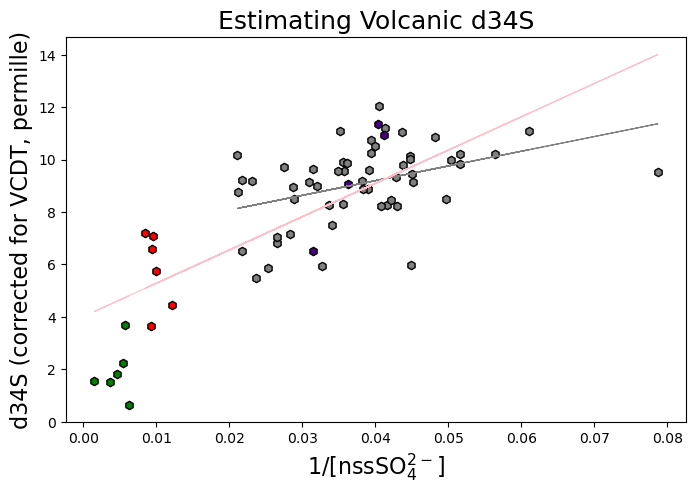

In [27]:
# FIGURE 9: 1/nssSO4 vs d34S
fig = plt. figure(figsize = [8,5])
plt.ylabel('d34S (corrected for VCDT, permille)',fontsize=16)
plt.xlabel('1/[nssSO$_4^{2-}$]',fontsize=16)
plt.title('Estimating Volcanic d34S',fontsize = 18)

plt.scatter(1/nssSO4_novolc,d34S_nssSO4_novolc,marker='h',color='gray',edgecolor='k')
plt.scatter(1/volc_nssSO4,volc_d34S,marker='h',color='red',edgecolor='k')
plt.scatter(1/patris02_pi_nssSO4,patris02_pi_d34S,marker='h',color='indigo',edgecolor='k')
plt.scatter(1/Jihong_sulfate,Jihong_d34S,marker='h',color='green',edgecolor='k')
slope, intercept, r_value, p_value, stderr = stats.linregress((1/nssSO4_novolc),d34S_nssSO4_novolc)
slope_J, intercept_J, r_value_J, p_value_J, stderr_J = stats.linregress((1/combined_sulfate),combined_d34S)
plt.plot(1/nssSO4_novolc,slope*(1/nssSO4_novolc)+intercept,color = 'gray',linewidth = 0.8)
plt.plot(1/combined_sulfate,slope_J*(1/combined_sulfate)+intercept_J,color = 'pink',linewidth = 0.8)
# plt.legend()
print('slope:',slope,'intercept',intercept,'stderror',stderr,'pvalue',p_value)
print('volc slope:',slope_J,'volce intercept:',intercept_J,'stderror of volc',stderr_J,'p-value of volc samples',p_value_J)

In [28]:
x = 1/combined_sulfate
y = combined_d34S
slope, intercept, r, p, stderr_slope = stats.linregress(x,y)
yhat = slope*x+intercept
Syx = np.sqrt(np.sum((y-yhat)**2)/(len(x)-2))
Sb = np.round(Syx*np.sqrt(np.sum(x**2)/(len(x)*np.sum((x-np.mean(x))**2))),1)
sigma_d34Sv = round(Sb,2)
print('The raw y intercept is',intercept)
print('The standard error associated with the preindustrial intercept is ',sigma_d34Sv)
print('The r value is',r)

The raw y intercept is 4.0086627981948
The standard error associated with the preindustrial intercept is  0.5
The r value is 0.7556775991538841


MONTE CARLO: Geometric mean intercept: 4.155462511872025
Just non-volcanic samples intercept: 6.953717720978277
Monte Carlo mean intercept with stratospheric and non-volcanic samples: 1.4504390865764303


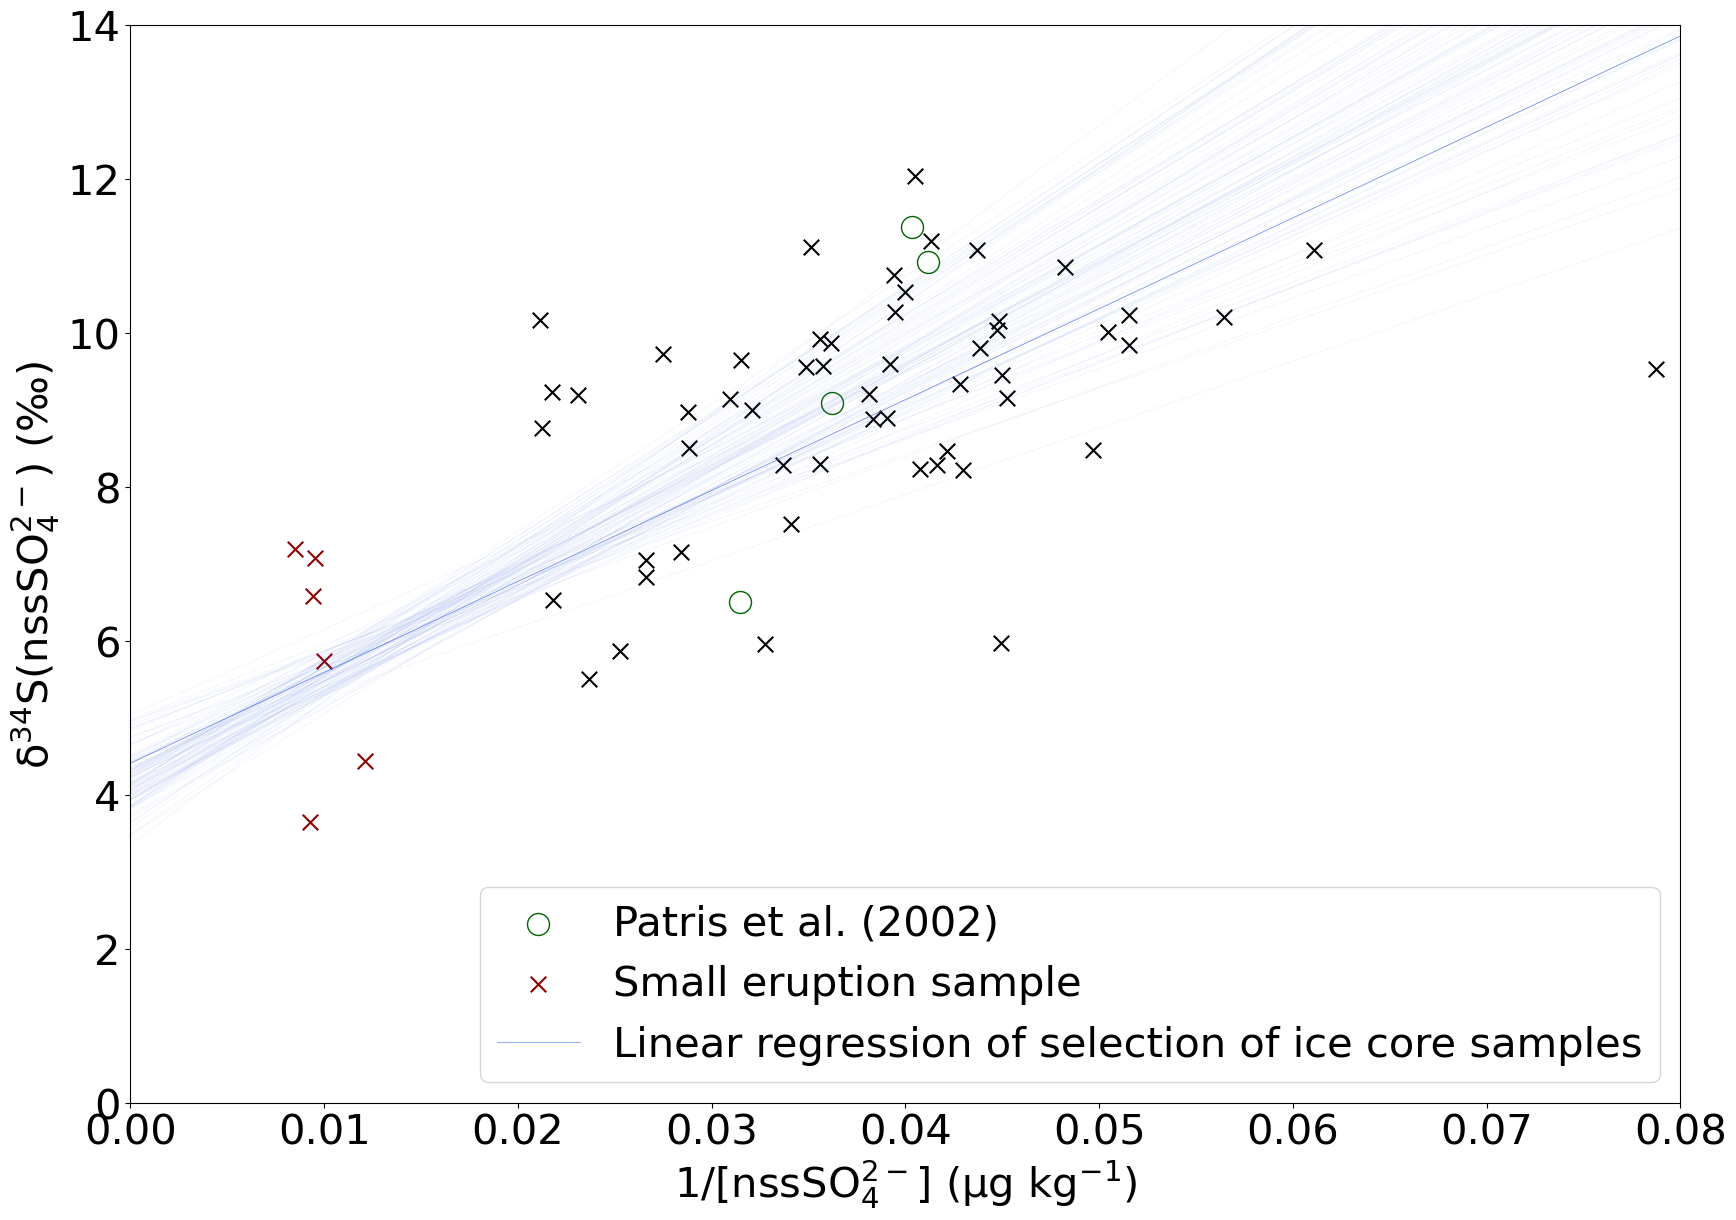

In [29]:
import random
k = 30
s=125
fig,ax = plt.subplots(figsize = [20,14])
ax.set_ylabel('δ$^{34}$S(nssSO$_4^{2-}$) (‰)',fontsize=k)
ax.set_xlabel('1/[nssSO$_4^{2-}$] (µg kg$^{-1}$)',fontsize=k)
ax.tick_params(labelsize=k)
ax.tick_params(labelsize=k)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# Initiate empty arrays
slopes = np.array([])
intercepts = np.array([])
stderr_ints = np.array([])
stderrs = np.array([])
slopes_J = np.array([])
intercepts_J = np.array([])
stderrs_J = np.array([])
xx= np.linspace(0,np.max(1/nssSO4_novolc)+0.01,15) # x values to use to create lines for plot
GM_slope = 0
GM_slopes = np.array([])
GM_intercept = 0
GM_ints = 0
rvalues = np.array([])
monte_xs = np.array([])
monte_ys = np.array([])

# for loop to perform regression 1000 times -- Monte Carlo style
for j in range(1,100):
    # Create a random list of integers between 0 and the length of the ice core dataset
    randomList = random.sample(range(0, len(d34S_nssSO4_novolc)), 6)
    
    # Select 6 random "background" samples so that they're equally weighted with volcanic samples
    select_nssSO4 = nssSO4_novolc.values[randomList]
    select_d34S = d34S_nssSO4_novolc.values[randomList]
    
    # Combine them into one array
    combined_sulfate = np.hstack((select_nssSO4,volc_nssSO4))
    combined_d34S = np.hstack((select_d34S,volc_d34S))
    monte_xs = np.append(monte_xs,1/combined_sulfate)
    monte_ys = np.append(monte_ys,combined_d34S)
    
    # Compute linear regression of the selected samples and plot the line and the samples
    slope, intercept, r_value, p_value, stderr = stats.linregress((1/combined_sulfate),combined_d34S)
    
    # save the slopes, intercepts, and standard error values into an erray
    slopes = np.append(slopes,slope)
    intercepts = np.append(intercepts,intercept)
    stderrs = np.append(stderrs,stderr)
    rvalues = np.append(rvalues,r_value)
    
    # now do a linear regression that INCLUDES the stratospheric eruptions but no small eruptions
    combined_sulfate2 = np.hstack((select_nssSO4,Jihong_sulfate))
    combined_d34S2 = np.hstack((select_d34S,Jihong_d34S))
    slope_J, intercept_J, r_value_J, p_value_J, stderr_J = stats.linregress((1/combined_sulfate2),combined_d34S2)
    
    # save all the slopes and intercepts and whatnot from this linear regression and plot the lines
    slopes_J = np.append(slopes_J,slope_J)
    intercepts_J = np.append(intercepts_J,intercept_J)
    stderrs_J = np.append(stderrs_J,stderr_J)
    
    # Compute the Geometric Mean (GM) slope and intercept -- see Pataki et al., 2003
    GM_slope = slope/r_value 
    GM_slopes = np.append(GM_slopes,GM_slope)
    GM_intercept = np.mean(combined_d34S) - GM_slope*np.mean(1/combined_sulfate)
    GM_ints = np.append(GM_ints,GM_intercept)
    ax.plot(xx,GM_slope*xx+GM_intercept,color = 'royalblue',linewidth = 0.5,alpha=0.08)

plt.scatter(1/patris02_pi_nssSO4,patris02_pi_d34S,label='Patris et al. (2002)',s=s*2,marker='o',color='white',
            edgecolor='darkgreen',alpha=1)    
ax.scatter(1/volc_nssSO4,volc_d34S,marker='x',color='darkred',s=s,label='Small eruption sample')
ax.scatter(1/nssSO4_novolc,d34S_nssSO4_novolc,marker='x',color='k',s=s,alpha=1)
slope3, intercept3, r_value3, p_value3, stderr3 = stats.linregress((1/nssSO4_trim),d34S_nssSO4_trim)
slope4, intercept4, r_value4, p_value4, stderr4 = stats.linregress((1/nssSO4_novolc),d34S_nssSO4_novolc)
ax.plot(xx,GM_slope*xx+GM_intercept,color = 'royalblue',linewidth = 0.5,alpha=0.8,
        label='Linear regression of selection of ice core samples')
ax.tick_params(labelsize= k)
ax.set_ylim([0,14])
ax.set_xlim([0,0.08])
ax.legend(loc='lower right',fontsize=k)
print('MONTE CARLO: Geometric mean intercept:',np.mean(GM_ints))
print('Just non-volcanic samples intercept:',intercept4)
print('Monte Carlo mean intercept with stratospheric and non-volcanic samples:',np.mean(intercepts_J))
d34S_vals = intercepts

In [30]:
x = np.hstack([1/nssSO4_ind,1/patris02_pd_nssSO4])
y = np.hstack([d34S_ind,patris02_pd_d34S])
slope, intercept, r, p, stderr_slope = stats.linregress(x,y)
GM_slope = slope/r
gm_int = np.mean(y - GM_slope*x)
yhat = slope*x+intercept
Syx = np.sqrt(np.sum((y-yhat)**2)/(len(x)-2))
Sb_anth = Syx*np.sqrt(np.sum(x**2)/(len(x)*np.sum((x-np.mean(x))**2)))
print('The geometric mean intercept is ',gm_int)
print('The standard error associated with the industrial era linear regression ',Sb_anth)

The geometric mean intercept is  2.798378520772337
The standard error associated with the industrial era linear regression  0.29592079754047995


In [31]:
#Isotopic source signatures
v = 4.139 #np.mean(GM_ints) #np.round(np.mean(GM_ints),1) # based on monte carlo regression
# Sb = 0.7
# v = 1.4 # testing different value # WITH THIS VALUE MEAN FVOLC=0.50
# v = 0 # testing different value # WITH THIS VALUE MEAN FVOLC=0.46
d34Sv=np.array([v-Sb,v,v+Sb])
d34Sb=np.array([18.5,18.8,19.1]) # Based on Patris et al. (2002)
d34Sa=np.array([gm_int-Sb_anth,gm_int,gm_int+Sb_anth]) # based on keeling plot above
d34Sv

array([3.64, 4.14, 4.64])

In [32]:
# PREINDUSTRIAL

fb_pre=(d34S_pre-d34Sv[1])/(d34Sb[1]-d34Sv[1])
fb_low_pre=(d34S_pre-d34Sv[2])/(d34Sb[2]-d34Sv[2])
fb_high_pre=(d34S_pre-d34Sv[0])/(d34Sb[0]-d34Sv[0])

bioSO4_pre = fb_pre*nssSO4_pre
bioSO4_low_pre = fb_low_pre*nssSO4_pre
bioSO4_high_pre = fb_high_pre*nssSO4_pre

volcSO4_pre = (1-fb_pre)*nssSO4_pre
volcSO4_low_pre = (1-fb_high_pre)
volcSO4_high_pre = (1-fb_low_pre)
volcSO4_old_median = np.median((1-fb_pre[fb_pre.index<1750])*nssSO4_pre[nssSO4_pre.index<1750])

# INDUSTRIAL

ice_year = ice_core.index

volcfrac = volcSO4_old_median/nssSO4_ind
d34S_ind_novolc = (d34S[ice_year>1850]-d34Sv[1]*volcfrac)/(1-volcfrac)
fb_ind=(d34S_ind_novolc-d34Sa[1])/(d34Sb[1]-d34Sa[1])
fb_low_ind=(d34S_ind_novolc-d34Sa[2])/(d34Sb[2]-d34Sa[2])
fb_high_ind=(d34S_ind_novolc-d34Sa[0])/(d34Sb[0]-d34Sa[0])

nssSO4_novolc = nssSO4_ind-volcSO4_old_median

bioSO4_ind=fb_ind*nssSO4_novolc
bioSO4_low_ind=fb_low_ind*nssSO4_novolc
bioSO4_high_ind=fb_high_ind*nssSO4_novolc

anthSO4_ind=(1-fb_ind)*nssSO4_novolc
anthSO4_low_ind=(1-fb_high_ind)*nssSO4_novolc
anthSO4_high_ind=(1-fb_low_ind)*nssSO4_novolc

volcSO4_ind=np.zeros(np.size(bioSO4_ind))+volcSO4_old_median

If f = a*b/c, the error in f is: sigma_f^2 = (b/c)^2 * sigma_a^2 + (a/c)^2 * sigma_b^2 + (-a*b/c^2)^2 * sigma_c^2

and bioSO4 = (d34S_meas - d34Sv)/(d34Sb - d34Sv) * nssSO4
volcSO4 = (d34S_meas - d34Sb)/(d34Sv - d34Sb) * nssSO4

Let's say a = (d34S_meas - d34Sv), b = nssSO4, c = (d34Sb - d34Sv)

remember that nssSO4 = [Na]/4*[SO4]

--> the error in f is: sigma_f^2 = (b/c)^2 * sigma_a^2 + (a/c)^2 * sigma_b^2 + (-a* b/c^2)^2 * sigma_c^2

sigma_a = sqrt(sigma_d34S_meas^2 + sigma_d34Sv^2)
sigma_b = sqrt([SO4]^2* sigma_Na^2 + [Na]^2* sigma_SO4^2)
sigma_c = sqrt(sigma_d34Sb^2 + sigma_d34Sv^2)

sigma_d34S_meas = error from VCDT calculation = Smeas
sigma_d34Sb = the range in typical source signature values
sigma_d34Sv = std error from monte carlo analysis

In [33]:
# ALRIGHT LET'S TRY IT

sulfate_pre = (((ice_core.sulfate[nssSO4.index<1850])[ice_core.sulfate[ice_years<1850]<60])[ice_core.sulfate[ice_years<1850]>3.5])
sigma_Na = 1 #*Na # 0.80 ppb for MSA, convert to µg
sigma_SO4 = 1 #*sulfate_pre

a = d34S_pre - d34Sv[1]
b = nssSO4_pre
c = d34Sb[1] - d34Sv[1]

sigma_d34Smeas = process_std_std # update based on Caitlin's advice
sigma_d34Sb = (d34Sb[2] - d34Sb[0])/2
sigma_d34Sv = Sb #error from monte carlo

sigma_a = np.mean(np.sqrt(sigma_d34Smeas**2 + sigma_d34Sv**2))
sigma_b = np.mean(np.sqrt(0.25*sigma_Na**2 + sigma_SO4**2))
sigma_c = np.mean(np.sqrt(sigma_d34Sb**2 + sigma_d34Sv**2))

sigma_bio_pre = np.sqrt((b/c)**2 * sigma_a**2 + (a/c)**2 * sigma_b**2 + (-a*b/c**2)**2 * sigma_c**2)
np.mean(sigma_bio_pre)
double_sigma_bio_pre = sigma_bio_pre[ice_core.Sample_length==2].values
single_sigma_bio_pre = sigma_bio_pre[ice_core.Sample_length==1].values

weighted_sigma_bio_pre = np.hstack([double_sigma_bio_pre,double_sigma_bio_pre,single_sigma_bio_pre])
np.mean(weighted_sigma_bio_pre)

2.5983726655491663

In [34]:
# What's the biggest source of error? a, b, or c?

error_a = np.sqrt((b/c)**2 * sigma_a**2)
error_b = np.sqrt((a/c)**2 * sigma_b**2)
error_c = np.sqrt((-a*b/c**2)**2 * sigma_c**2)

print('error from a:',np.mean(error_a), 'about 2/3 of error comes from d34Smeas - d34Sv')
print('error from b:',np.mean(error_b), 'very little error comes from conc. measurements of Na and SO4')
print('error from c:',np.mean(error_c), 'about 1/3 of error comes from d34Sb - d34Sv')

print('b/c         :',np.mean(b/c))
# print('1/c         :',np.mean(1/c))
print('sigma a     :',np.mean(sigma_a))
print('meas error  :',np.mean(process_std_std))
print('volc error  :',Sb)


error from a: 2.572235348563938 about 2/3 of error comes from d34Smeas - d34Sv
error from b: 0.38311917711503407 very little error comes from conc. measurements of Na and SO4
error from c: 0.38338638037953354 about 1/3 of error comes from d34Sb - d34Sv
b/c         : 1.9776536389059405
sigma a     : 1.3006500723690557
meas error  : 1.2007042145148112
volc error  : 0.5


In [35]:
# ALRIGHT LET'S TRY IT for VOLCANIC

a = d34S_pre - d34Sb[1]
b = nssSO4_pre
c = d34Sv[1] - d34Sb[1]

sigma_d34Smeas = process_std_std # update based on Caitlin's advice
sigma_d34Sb = (d34Sb[2] - d34Sb[0])/2
sigma_d34Sv = sigma_d34Sv #error from monte carlo

sigma_a = np.mean(np.sqrt(sigma_d34Smeas**2 + sigma_d34Sb**2))
sigma_b = np.mean(np.sqrt(0.25*sigma_Na**2 + sigma_SO4**2))
sigma_c = np.mean(np.sqrt(sigma_d34Sb**2 + sigma_d34Sv**2))

sigma_volc_pre = np.sqrt((b/c)**2 * sigma_a**2 + (a/c)**2 * sigma_b**2 + (-a*b/c**2)**2 * sigma_c**2)

double_sigma_volc_pre = sigma_volc_pre[ice_core.Sample_length==2].values
single_sigma_volc_pre = sigma_volc_pre[ice_core.Sample_length==1].values

weighted_sigma_volc_pre = np.hstack([double_sigma_volc_pre,double_sigma_volc_pre,single_sigma_volc_pre])
np.mean(sigma_volc_pre)

2.676373658390829

## Post-1850 sample error
# NOTE: this is done more clearly in the anthro paper analysis

First must correct d34Smeas and nssSO4 to subtract volcanic sulfur

nssSO4_novolc = nssSO4_ind - np.mean(volcSO4_pre[bioSO4_pre>0])
    and the error is sigma_novolc^2 = sigma_SO4^2 + sigma_volc_pre^2

d34S_novolc = (d34Smeas - d34Sv * volcfrac) / (1 - volcfrac)

Now for calculating anthro and bio sulfate during the industrial era:

anthSO4 = (d34S_novolc - d34Sb)/(d34Sa - d34Sb) * nssSO4_novolc
bioSO4 = (d34S_novolc - d34Sa)/(d34Sb - d34Sa) * nssSO4_novolc

Let's say a = (d34S_novolc - d34Sb), b = nssSO4_novolc, c = (d34Sa - d34Sb)

--> the error in f is: sigma_f^2 = (b/c)^2 * sigma_a^2 + (a/c)^2 * sigma_b^2 + (-a * b/c^2)^2 * sigma_c^2

sigma_a = sqrt(sigma_d34S_novolc^2 + sigma_d34Sb^2)
sigma_b = sqrt((nssSO4_novolc^2* sigma_Na^2 + [Na]^2* sigma_SO4^2) + mean(sigma_volcSO4_pre)^2)
sigma_c = sqrt(sigma_d34Sa^2 + sigma_d34Sb^2)

sigma_d34S_novolc = SEE ACTUAL MATH
sigma_d34Sb = the range in typical source signature values
sigma_d34Sa = the range in typical source signature values
sigma_d34Sv = std error from monte carlo analysis


FOR BIOSO4_IND:

Let's say a = (d34S_novolc - d34Sa), b = nssSO4_novolc, c = (d34Sb - d34Sa)

--> the error in f is: sigma_f^2 = (b/c)^2 * sigma_a^2 + (a/c)^2 * sigma_b^2 + (-a * b/c^2)^2 * sigma_c^2

sigma_a = sqrt(sigma_d34S_novolc^2 + sigma_d34Sa^2)
sigma_b = sqrt((nssSO4_novolc^2* sigma_Na^2 + [Na]^2* sigma_SO4^2) + mean(sigma_volcSO4_pre)^2)
sigma_c = sqrt(sigma_d34Sb^2 + sigma_d34Sa^2)

sigma_d34S_novolc = SEE ACTUAL MATH
sigma_d34Sb = the range in typical source signature values
sigma_d34Sa = the range in typical source signature values
sigma_d34Sv = std error from monte carlo analysis

In [36]:
double_nssSO4 = nssSO4_pre[ice_core.Sample_length==2].values
single_nssSO4 = nssSO4_pre[ice_core.Sample_length==1].values
double_yr = nssSO4_pre[ice_core.Sample_length==2].index
single_yr = nssSO4_pre[ice_core.Sample_length==1].index
double_d34S = (d34S_pre)[ice_core.Sample_length==2].values
single_d34S = (d34S_pre)[ice_core.Sample_length==1].values

double_volc = volcSO4_pre[ice_core.Sample_length==2].values
single_volc = volcSO4_pre[ice_core.Sample_length==1].values

double_bio = bioSO4_pre[ice_core.Sample_length==2].values
single_bio = bioSO4_pre[ice_core.Sample_length==1].values

mean_volc_old = np.nanmean(np.hstack([double_volc,double_volc,single_volc]))
median_volc_old = np.nanmedian(np.hstack([double_volc,double_volc,single_volc]))

volc_rn = median_volc_old
# sigma_d34Sv = 0.8 #error from monte carlo

# Okay let's try it
Na_ind = ice_core.sodium[ice_core.index>1850]
sigma_d34Sa = (d34Sa[2] - d34Sa[0])/2
sigma_volc_ind = np.std(volcSO4_pre) # make the error in d34Sv equal to the stdev of the preindustrial volc SO4 conc.

volcfrac = volc_rn/nssSO4_ind
sigma_volcfrac = np.sqrt((1/nssSO4_ind)*sigma_volc_ind**2 + volc_rn*(1/nssSO4_ind**2))
nssSO4_novolc = nssSO4_ind - np.ones(len(nssSO4_ind))*volc_rn
sigma_novolc = np.sqrt(np.mean(np.sqrt(0.25*sigma_Na**2 + sigma_SO4**2))**2 + sigma_volc_ind**2)

sigma_volcfrac = np.sqrt((sigma_novolc/nssSO4_ind)**2 + ((-nssSO4_novolc/nssSO4_ind**2)*np.mean(np.sqrt(0.25*sigma_Na**2 + sigma_SO4**2)))**2)
d34S_novolc = (d34S_ind - d34Sv[1] * volcfrac) / (1 - volcfrac)

bioSO4_ind = (d34S_novolc - d34Sa[1]) / (d34Sb[1] - d34Sa[1]) * nssSO4_novolc
anthSO4 =(d34S_novolc - d34Sb[1]) / (d34Sa[1] - d34Sb[1]) * nssSO4_novolc
volcSO4_ind = np.ones(len(nssSO4_novolc))*volc_rn

a = (d34S_novolc - d34Sb[1])
b = nssSO4_novolc
c = (d34Sa[1] - d34Sb[1])

sigma_d34S_novolc = np.sqrt( (sigma_d34Smeas**2 + volcfrac*sigma_d34Sv**2 + d34Sv[1]*sigma_volcfrac**2)/(1-volcfrac) +
                           (sigma_volcfrac**2/(1-volcfrac)**4)* (d34S_ind - volcfrac*d34Sv[1]) ) #THIS IS COMPLICATED, SEE POWERPOINT SLIDE FOR CLARIFICATION

#np.sqrt(1/(1-volcfrac) * np.sqrt(sigma_d34Smeas**2 + sigma_volcfrac**2 * d34Sv[1] + sigma_d34Sv**2 *volcfrac))
sigma_d34Sb = (d34Sb[2] - d34Sb[0])/2
sigma_d34Sa = (d34Sa[2] - d34Sa[0])/2


sigma_a = np.sqrt(sigma_d34S_novolc**2 + sigma_d34Sb**2)
sigma_b = np.sqrt((nssSO4_novolc**2* sigma_Na**2 + Na_ind**2* sigma_SO4**2) + np.mean(sigma_volc_pre)**2)
sigma_c = np.sqrt(sigma_d34Sb**2 + sigma_d34Sa**2)

sigma_anthro = np.sqrt((b/c)**2 * sigma_a**2 + (a/c)**2 * sigma_b**2 + (-a*b/c**2)**2 * sigma_c**2)

sigma_anthro_frac = np.sqrt(sigma_anthro**2 * (-1/nssSO4_ind)**2 + sigma_SO4**2 * anthSO4_ind**2)

print(np.mean(Na_ind**2* sigma_SO4**2))



29.485842922607258


In [37]:
# What's the biggest source of error? a, b, or c?

error_a = np.sqrt((b/c)**2 * sigma_a**2)
error_b = np.sqrt((a/c)**2 * sigma_b**2)
error_c = np.sqrt((-a*b/c**2)**2 * sigma_c**2)

print('error from a:',np.mean(error_a))
print('error from b:',np.mean(error_b))
print('error from c:',np.mean(error_c))

print('b/c         :',np.mean(b/c))
# print('1/c         :',np.mean(1/c))
print('sigma a     :',np.mean(sigma_a))
print('meas error  :',np.mean(process_std_std))
print('volc error  :',Sb)


error from a: 5.091549073820296
error from b: 39.37603446241044
error from c: 1.0297708199280218
b/c         : -3.2073584618856317
sigma a     : 1.9404640623277853
meas error  : 1.2007042145148112
volc error  : 0.5


In [38]:
# Now for bio
a = (d34S_novolc - d34Sa[1])
b = nssSO4_novolc
c = (d34Sb[1] - d34Sa[1])

sigma_d34S_novolc = np.sqrt( (sigma_d34Smeas**2 + volcfrac*sigma_d34Sv**2)/(1-volcfrac) +
                           (sigma_volcfrac**2/(1-volcfrac)**4)* (d34S_ind - volcfrac*d34Sv[1]) ) #THIS IS COMPLICATED, SEE POWERPOINT SLIDE FOR CLARIFICATION
sigma_d34Sb = (d34Sb[2] - d34Sb[0])/2
sigma_d34Sa = (d34Sa[2] - d34Sa[0])/2
sigma_d34Sv = (d34Sv[2] - d34Sv[0])/2 #np.std(volcSO4_pre)

sigma_a = np.sqrt(sigma_d34S_novolc**2 + sigma_d34Sa**2)
sigma_b = np.sqrt((nssSO4_novolc**2* sigma_Na**2 + Na_ind**2* sigma_SO4**2) + np.mean(sigma_volc_pre)**2)
sigma_c = np.sqrt(sigma_d34Sa**2 + sigma_d34Sb**2)

sigma_bio_ind = np.sqrt((b/c)**2 * sigma_a**2 + (a/c)**2 * sigma_b**2 + (-a*b/c**2)**2 * sigma_c**2)

In [39]:
# What's the biggest source of error? a, b, or c?

error_a = np.sqrt((b/c)**2 * sigma_a**2)
error_b = np.sqrt((a/c)**2 * sigma_b**2)
error_c = np.sqrt((-a*b/c**2)**2 * sigma_c**2)

print('error from a:',np.mean(error_a), 'about 2/3 of error comes from d34Smeas - d34Sv')
print('error from b:',np.mean(error_b), 'very little error comes from conc. measurements of Na and SO4')
print('error from c:',np.mean(error_c), 'about 1/3 of error comes from d34Sb - d34Sv')

print('b/c         :',np.mean(b/c))
# print('1/c         :',np.mean(1/c))
print('sigma a     :',np.mean(sigma_a))
print('meas error  :',np.mean(process_std_std))
print('bio error  :',sigma_d34Sb)


error from a: 5.030245336540328 about 2/3 of error comes from d34Smeas - d34Sv
error from b: 12.599348059804779 very little error comes from conc. measurements of Na and SO4
error from c: 0.3256216762164477 about 1/3 of error comes from d34Sb - d34Sv
b/c         : 3.2073584618856317
sigma a     : 1.911741531302992
meas error  : 1.2007042145148112
bio error  : 0.3000000000000007


In [40]:
volc_5  = np.percentile(volcSO4_pre,5)
volc_10 = np.percentile(volcSO4_pre,10)
volc_30 = np.percentile(volcSO4_pre,30)
volc_50 = np.percentile(volcSO4_pre,50)
volc_70 = np.percentile(volcSO4_pre,70)
volc_90 = np.percentile(volcSO4_pre,90)
volc_95 = np.percentile(volcSO4_pre,95)

In [41]:
# # NOTE: NAMED VARIABLES 10, 50, AND 90, but decided to use 5, 50, and 95

volcfrac5 = volc_5/nssSO4_ind
volcfrac50 = volc_50/nssSO4_ind
volcfrac95 = volc_95/nssSO4_ind

nssSO4_novolc_5 = nssSO4_ind - np.ones(len(nssSO4_ind))*volc_5
nssSO4_novolc_50 = nssSO4_ind - np.ones(len(nssSO4_ind))*volc_50
nssSO4_novolc_95 = nssSO4_ind - np.ones(len(nssSO4_ind))*volc_95

sigma_novolc = np.sqrt(np.mean(np.sqrt(0.25*sigma_Na**2 + sigma_SO4**2))**2 + sigma_volc_ind**2)
sigma_volcfrac = np.sqrt((sigma_novolc/nssSO4_ind)**2 + ((-nssSO4_novolc/nssSO4_ind**2)*np.mean(np.sqrt(
    0.25*sigma_Na**2 + sigma_SO4**2)))**2)

d34S_novolc_5 = (d34S_ind - d34Sv[1] * volcfrac5) / (1 - volcfrac5)
d34S_novolc_50 = (d34S_ind - d34Sv[1] * volcfrac50) / (1 - volcfrac50)
d34S_novolc_95 = (d34S_ind - d34Sv[1] * volcfrac95) / (1 - volcfrac95)

bioSO4_ind_5 = (d34S_novolc_5 - d34Sa[1]) / (d34Sb[1] - d34Sa[1]) * nssSO4_novolc_5
bioSO4_ind_50 = (d34S_novolc_50 - d34Sa[1]) / (d34Sb[1] - d34Sa[1]) * nssSO4_novolc_50
bioSO4_ind_95 = (d34S_novolc_95 - d34Sa[1]) / (d34Sb[1] - d34Sa[1]) * nssSO4_novolc_95

anthSO4_5 =(d34S_novolc_5 - d34Sb[1]) / (d34Sa[1] - d34Sb[1]) * nssSO4_novolc_5
anthSO4_50 =(d34S_novolc_50 - d34Sb[1]) / (d34Sa[1] - d34Sb[1]) * nssSO4_novolc_50
anthSO4_95 =(d34S_novolc_95 - d34Sb[1]) / (d34Sa[1] - d34Sb[1]) * nssSO4_novolc_95

volcSO4_ind_5 = np.ones(len(nssSO4_novolc))*volc_5
volcSO4_ind_50 = np.ones(len(nssSO4_novolc))*volc_50
volcSO4_ind_95 = np.ones(len(nssSO4_novolc))*volc_95

In [42]:
year = (bioSO4_pre[bioSO4_pre>0])[bioSO4_pre<28].index
year2 = bioSO4_ind.index
years = np.hstack([year,year2])
nssSO4_all = np.hstack([nssSO4_pre,nssSO4_ind])
bioSO4 = np.hstack([bioSO4_pre,bioSO4_ind])
volcSO4 = np.hstack([volcSO4_pre,volcSO4_ind])
anthSO4_all = np.hstack([np.zeros(len(volcSO4_pre)),anthSO4])

all_data = pd.read_excel('./ice_core_data/all_data.xlsx').drop(8711).drop(8710)
year1 = all_data.year1
SO4_raw = all_data.SO4
nssSO4_raw = all_data.nssSO4
year = year1.values[::-1]
tstep=1
yr=np.linspace(int(year[1]),1202,int((2007-1202)/tstep+1))
nssSO4_df = pd.DataFrame(data=nssSO4_raw.values,index=year1.values,columns=['nssSO4'])
# nssSO4_1yr = nssSO4_df.groupby('year').mean()
nssSO4_1yr = nssSO4_df.groupby(by=None, axis=0, level=0, as_index=True).mean()

sigma_bio = np.hstack([sigma_bio_pre,sigma_bio_ind])
sigma_volc = np.hstack([sigma_volc_pre,np.ones(len(sigma_bio_ind))*sigma_volc_ind])
sigma_anth = np.hstack([np.zeros(len(sigma_volc_pre)),sigma_anthro])

In [43]:
nssSO4_chosen_pre = np.ones(len(nssSO4_pre))
nssSO4_chosen_ind = np.ones(len(nssSO4_ind))
nssSO4_1yr_pre = nssSO4_1yr[nssSO4_1yr.index<1850]
nssSO4_1yr_ind = nssSO4_1yr[nssSO4_1yr.index>1850]
j=0
for i in range(0,len(nssSO4_1yr_pre)-1,1):
    if j < 81:
        if nssSO4_1yr_pre.index[i] == nssSO4_pre.index[j]:
            nssSO4_chosen_pre[j] = nssSO4_1yr_pre.values[i]
            j = j+1
j=0
for i in range(0,len(nssSO4_1yr_ind),1):
    if j < 61:
        if nssSO4_1yr_ind.index[i] == nssSO4_ind.index[j]:
            nssSO4_chosen_ind[j] = nssSO4_1yr_ind.values[i]
            j = j+1

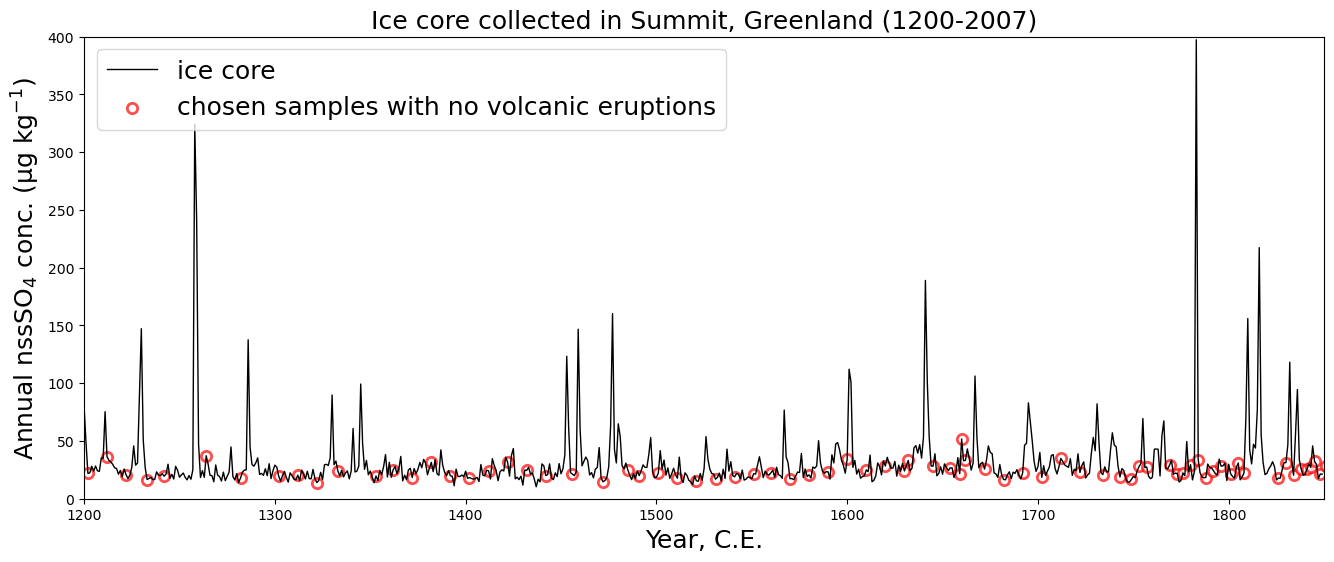

In [44]:
plt.figure(figsize=[16,6])
plt.plot(nssSO4_1yr[nssSO4_1yr.index>1850].index,nssSO4_1yr[nssSO4_1yr.index>1850].values,color='k',linewidth=1,alpha=1,label='ice core')
plt.plot(nssSO4_1yr[nssSO4_1yr.index<1850].index,nssSO4_1yr[nssSO4_1yr.index<1850].values,color='k',linewidth=1)
plt.scatter(nssSO4_pre.index,nssSO4_chosen_pre,color='white',edgecolor='red',linewidth=2,s=55,alpha=0.7,label='chosen samples with no volcanic eruptions')
plt.scatter(nssSO4_ind.index,nssSO4_chosen_ind,color='white',edgecolor='red',linewidth=2,s=55,alpha=0.7)
# plt.plot(nssSO4_pre.index,nssSO4_pre.values,color='darkblue',linewidth=1,alpha=0.5)
# plt.plot(nssSO4_ind.index,nssSO4_ind.values,color='darkblue',linewidth=1,alpha=0.1)
plt.xlim([1200,1850])
plt.ylim([0,400])
plt.ylabel('Annual nssSO$_4$ conc. (µg kg$^{-1}$)',fontsize=18)
plt.xlabel('Year, C.E.',fontsize=18)
plt.title('Ice core collected in Summit, Greenland (1200-2007)',fontsize=18)
# xcoords = ice_core.index.values
# for i in xcoords:
#     plt.axvline(x=i,color='darkblue',alpha=0.2,linewidth=2)
# plt.scatter(1912,280,color='red',marker='*',s=100,label='marker at 1912')
# plt.scatter(1991,280,color='purple',marker='*',s=100,label='marker at 1991')
# plt.axvline(x=1925,linewidth=175,color='k',alpha=0.3)
plt.legend(loc='upper left',fontsize=18)

### Calculating volcanic fraction error

In [45]:
Na = ice_core.sodium[ice_core.index<1850]
SO4 = ice_core.sulfate[ice_core.index<1850]
# sigma_nssSO4_pre = np.sqrt(0.25*sigma_Na**2 + sigma_SO4**2)
sigma_nssSO4_pre = np.sqrt(0.25*(Na**2*sigma_SO4**2 + SO4**2*sigma_Na**2))
np.mean(sigma_nssSO4_pre)

18.436231769980047

In [46]:
def sig_a_div_b(a,b,sig_a,sig_b):
    sigma = np.sqrt((1/b)**2 * sig_a**2 + (-a/b**2)**2 * sig_b**2)
    return sigma

sigma_volcfrac = sig_a_div_b(volcSO4_pre,nssSO4_pre,sigma_volc_pre,np.mean(np.sqrt(0.25*sigma_Na**2 + sigma_SO4**2)))
sigma_vf = (sigma_volcfrac)[~np.isnan(sigma_volcfrac)]
np.mean(sigma_vf) # contains all years

0.09654214714775287

In [47]:
volcbio_ratio = np.mean(volcSO4_pre)/np.mean(bioSO4_pre)
sigma_volcbio_ratio = np.sqrt((1/bioSO4_pre)**2 * sigma_volc_pre**2 + (-volcSO4_pre / bioSO4_pre**2)**2 * sigma_bio_pre**2)
np.mean(sigma_volcbio_ratio)
np.std(volcSO4_pre/bioSO4_pre)

1.5698256238465496

In [48]:
# printing to put in excel for supp dataset
j=2
a1 = nssSO4_pre[ice_core.Sample_length==j].index
a2 = ice_core.sulfate[ice_core.Sample_length==j].values
a3 = ice_core.sodium[ice_core.Sample_length==j].values
a4 = ice_core.d34S_VCDT[ice_core.Sample_length==j].values
a5 = (d34S_pre)[ice_core.Sample_length==j].values
a6 = nssSO4_pre[ice_core.Sample_length==j].values
a7 = bioSO4_pre[ice_core.Sample_length==j].values
a8 = volcSO4_pre[ice_core.Sample_length==j].values
# print(len(a1))
# for i in range(0,len(a1)):
#     print(a1[i],a2[i],a3[i],a4[i],a5[i],a6[i],a7[i],a8[i])

In [49]:
# printing to put in excel for supp dataset
a1 = nssSO4_ind.index
a2 = (ice_core.sulfate[ice_core.index>1850]).values
a3 = (ice_core.sodium[ice_core.index>1850]).values
a4 = nssSO4_ind.values
a5 = (ice_core.d34S_VCDT[ice_core.index>1850]).values
a6 = (d34S_ind).values
a7 = bioSO4_ind.values
a8 = mean_volc_old
a9 = median_volc_old
a10 = anthSO4.values
# print(len(a1))
# for i in range(0,len(a1)):
#     print(a1[i],a2[i],a3[i],a4[i],a5[i],a6[i],a7[i],a8,a9,a10[i])

In [50]:
# printing to put in excel for supp dataset
a1 = nssSO4_ind.index
a2 = sigma_bio_ind.values
a3 = sigma_volc_ind
a4 = sigma_anthro.values
a5 = bioSO4_ind_5.values
a6 = bioSO4_ind_95.values
a7 = volcSO4_ind_5
a8 = volcSO4_ind_95
a9 = anthSO4_5.values
a10 = anthSO4_95.values
# print(len(a1))
# for i in range(0,len(a1)):
#     print(a1[i],a2[i],a3,a4[i],a5[i],a6[i],a7[i],a8[i],a9[i],a10[i])

In [51]:
# printing to put in excel for supp dataset
j = 1
a1 = nssSO4_pre[ice_core.Sample_length==j].index
a2 = sigma_bio_pre[ice_core.Sample_length==j].values
a3 = sigma_volc_pre[ice_core.Sample_length==j].values

# print(len(a1))
# for i in range(0,len(a1)):
#     print(a1[i],a2[i],a3[i])

In [52]:
double_nssSO4 = nssSO4_pre[ice_core.Sample_length==2].values
single_nssSO4 = nssSO4_pre[ice_core.Sample_length==1].values
double_yr = nssSO4_pre[ice_core.Sample_length==2].index
single_yr = nssSO4_pre[ice_core.Sample_length==1].index
double_d34S = (d34S_pre)[ice_core.Sample_length==2].values
single_d34S = (d34S_pre)[ice_core.Sample_length==1].values

double_volc = volcSO4_pre[ice_core.Sample_length==2].values
single_volc = volcSO4_pre[ice_core.Sample_length==1].values

double_bio = bioSO4_pre[ice_core.Sample_length==2].values
single_bio = bioSO4_pre[ice_core.Sample_length==1].values

mean_volc = np.nanmean(np.hstack([double_volc,double_volc,single_volc]))
mean_bio = np.nanmean(np.hstack([double_bio,double_bio,single_bio]))
std_volc = np.nanstd(np.hstack([double_volc,double_volc,single_volc]))
std_bio = np.nanstd(np.hstack([double_bio,double_bio,single_bio]))
std_ratio = np.std(np.hstack([double_volc,double_volc,single_volc])/np.hstack([double_bio,double_bio,single_bio]))

meand34S = np.nanmean(np.hstack([double_d34S, double_d34S, single_d34S]))

volcfracs = volcSO4_pre/(volcSO4_pre + bioSO4_pre)
volc_fracs_wtd = np.hstack([double_volc,double_volc,single_volc])/np.hstack([double_volc+double_bio,double_volc+double_bio,single_volc+single_bio])

nyears = len(double_bio)*2 + len(single_bio)

median_frac = np.nanmedian(np.hstack([(double_volc/(double_volc+double_bio)), (double_volc/(double_volc+double_bio)), (single_volc/(single_volc+single_bio))]))
mean_frac = np.nanmean(np.hstack([(double_volc/(double_volc+double_bio)), (double_volc/(double_volc+double_bio)), (single_volc/(single_volc+single_bio))]))

print('Mean d34S after correcting for 2-yr and 1-yr samples:',np.round(meand34S,2))
print('Mean volcanic concentration after correcting for 2-yr and 1-yr samples:',np.round(mean_volc,2))
print('Mean biogenic concentration after correcting for 2-yr and 1-yr samples:',np.round(mean_bio,2))
print('Std  volcanic concentration after correcting for 2-yr and 1-yr samples:',np.round(std_volc,2))
print('Std  biogenic concentration after correcting for 2-yr and 1-yr samples:',np.round(std_bio,2))
print('mean volc to biogenic concentration ratio',np.round(mean_volc/mean_bio,2))
print('std volc to biogenic concentration ratio',np.round(std_ratio,2))

print('Mean volcanic fraction after correcting for 2-yr and 1-yr samples:',np.round(mean_frac,2))
print('Median volcanic fraction after correcting for 2-yr and 1-yr samples:',np.round(median_frac,2))
print('std deviation volcanic fraction after correcting for 2-yr and 1-yr samples',np.round(np.nanstd(volc_fracs_wtd),2))
print('mean volcanic fraction after correcting for 2-yr and 1-yr samples',np.round(np.nanmean(volc_fracs_wtd),2))
print('Mean preindustrial d34S after correcting for 2-yr and 1-yr samples:',np.round(meand34S,1))


Mean d34S after correcting for 2-yr and 1-yr samples: 9.15
Mean volcanic concentration after correcting for 2-yr and 1-yr samples: 19.13
Mean biogenic concentration after correcting for 2-yr and 1-yr samples: 9.43
Std  volcanic concentration after correcting for 2-yr and 1-yr samples: 7.11
Std  biogenic concentration after correcting for 2-yr and 1-yr samples: 3.02
mean volc to biogenic concentration ratio 2.03
std volc to biogenic concentration ratio 1.67
Mean volcanic fraction after correcting for 2-yr and 1-yr samples: 0.66
Median volcanic fraction after correcting for 2-yr and 1-yr samples: 0.65
std deviation volcanic fraction after correcting for 2-yr and 1-yr samples 0.1
mean volcanic fraction after correcting for 2-yr and 1-yr samples 0.66
Mean preindustrial d34S after correcting for 2-yr and 1-yr samples: 9.1


In [53]:
print('Mean d34S during MSA Minimum',np.round(np.mean(d34S_ind.iloc[33:50])))
print('Mean d34S during 2000s',np.round(np.mean(d34S_ind.iloc[56:])))

Mean d34S during MSA Minimum 5.0
Mean d34S during 2000s 7.0


In [54]:
# calculating what the GEOS-Chem volc fraction would be if biogenic sulfate were at preindustrial levels
GEOS_corrected = 36 / (36 + 64 * np.nanmedian(bioSO4_pre)/np.nanmedian(bioSO4_ind))
GEOS_corrected

0.436170332598064

In [55]:
# calculating what the GEOS-Chem volc fraction would be if biogenic sulfate were 1/3 of preindustrial levels
GEOS_corrected = 36 / (36 + 64 * 1/3)
GEOS_corrected

0.627906976744186

(0.0, 350.0)

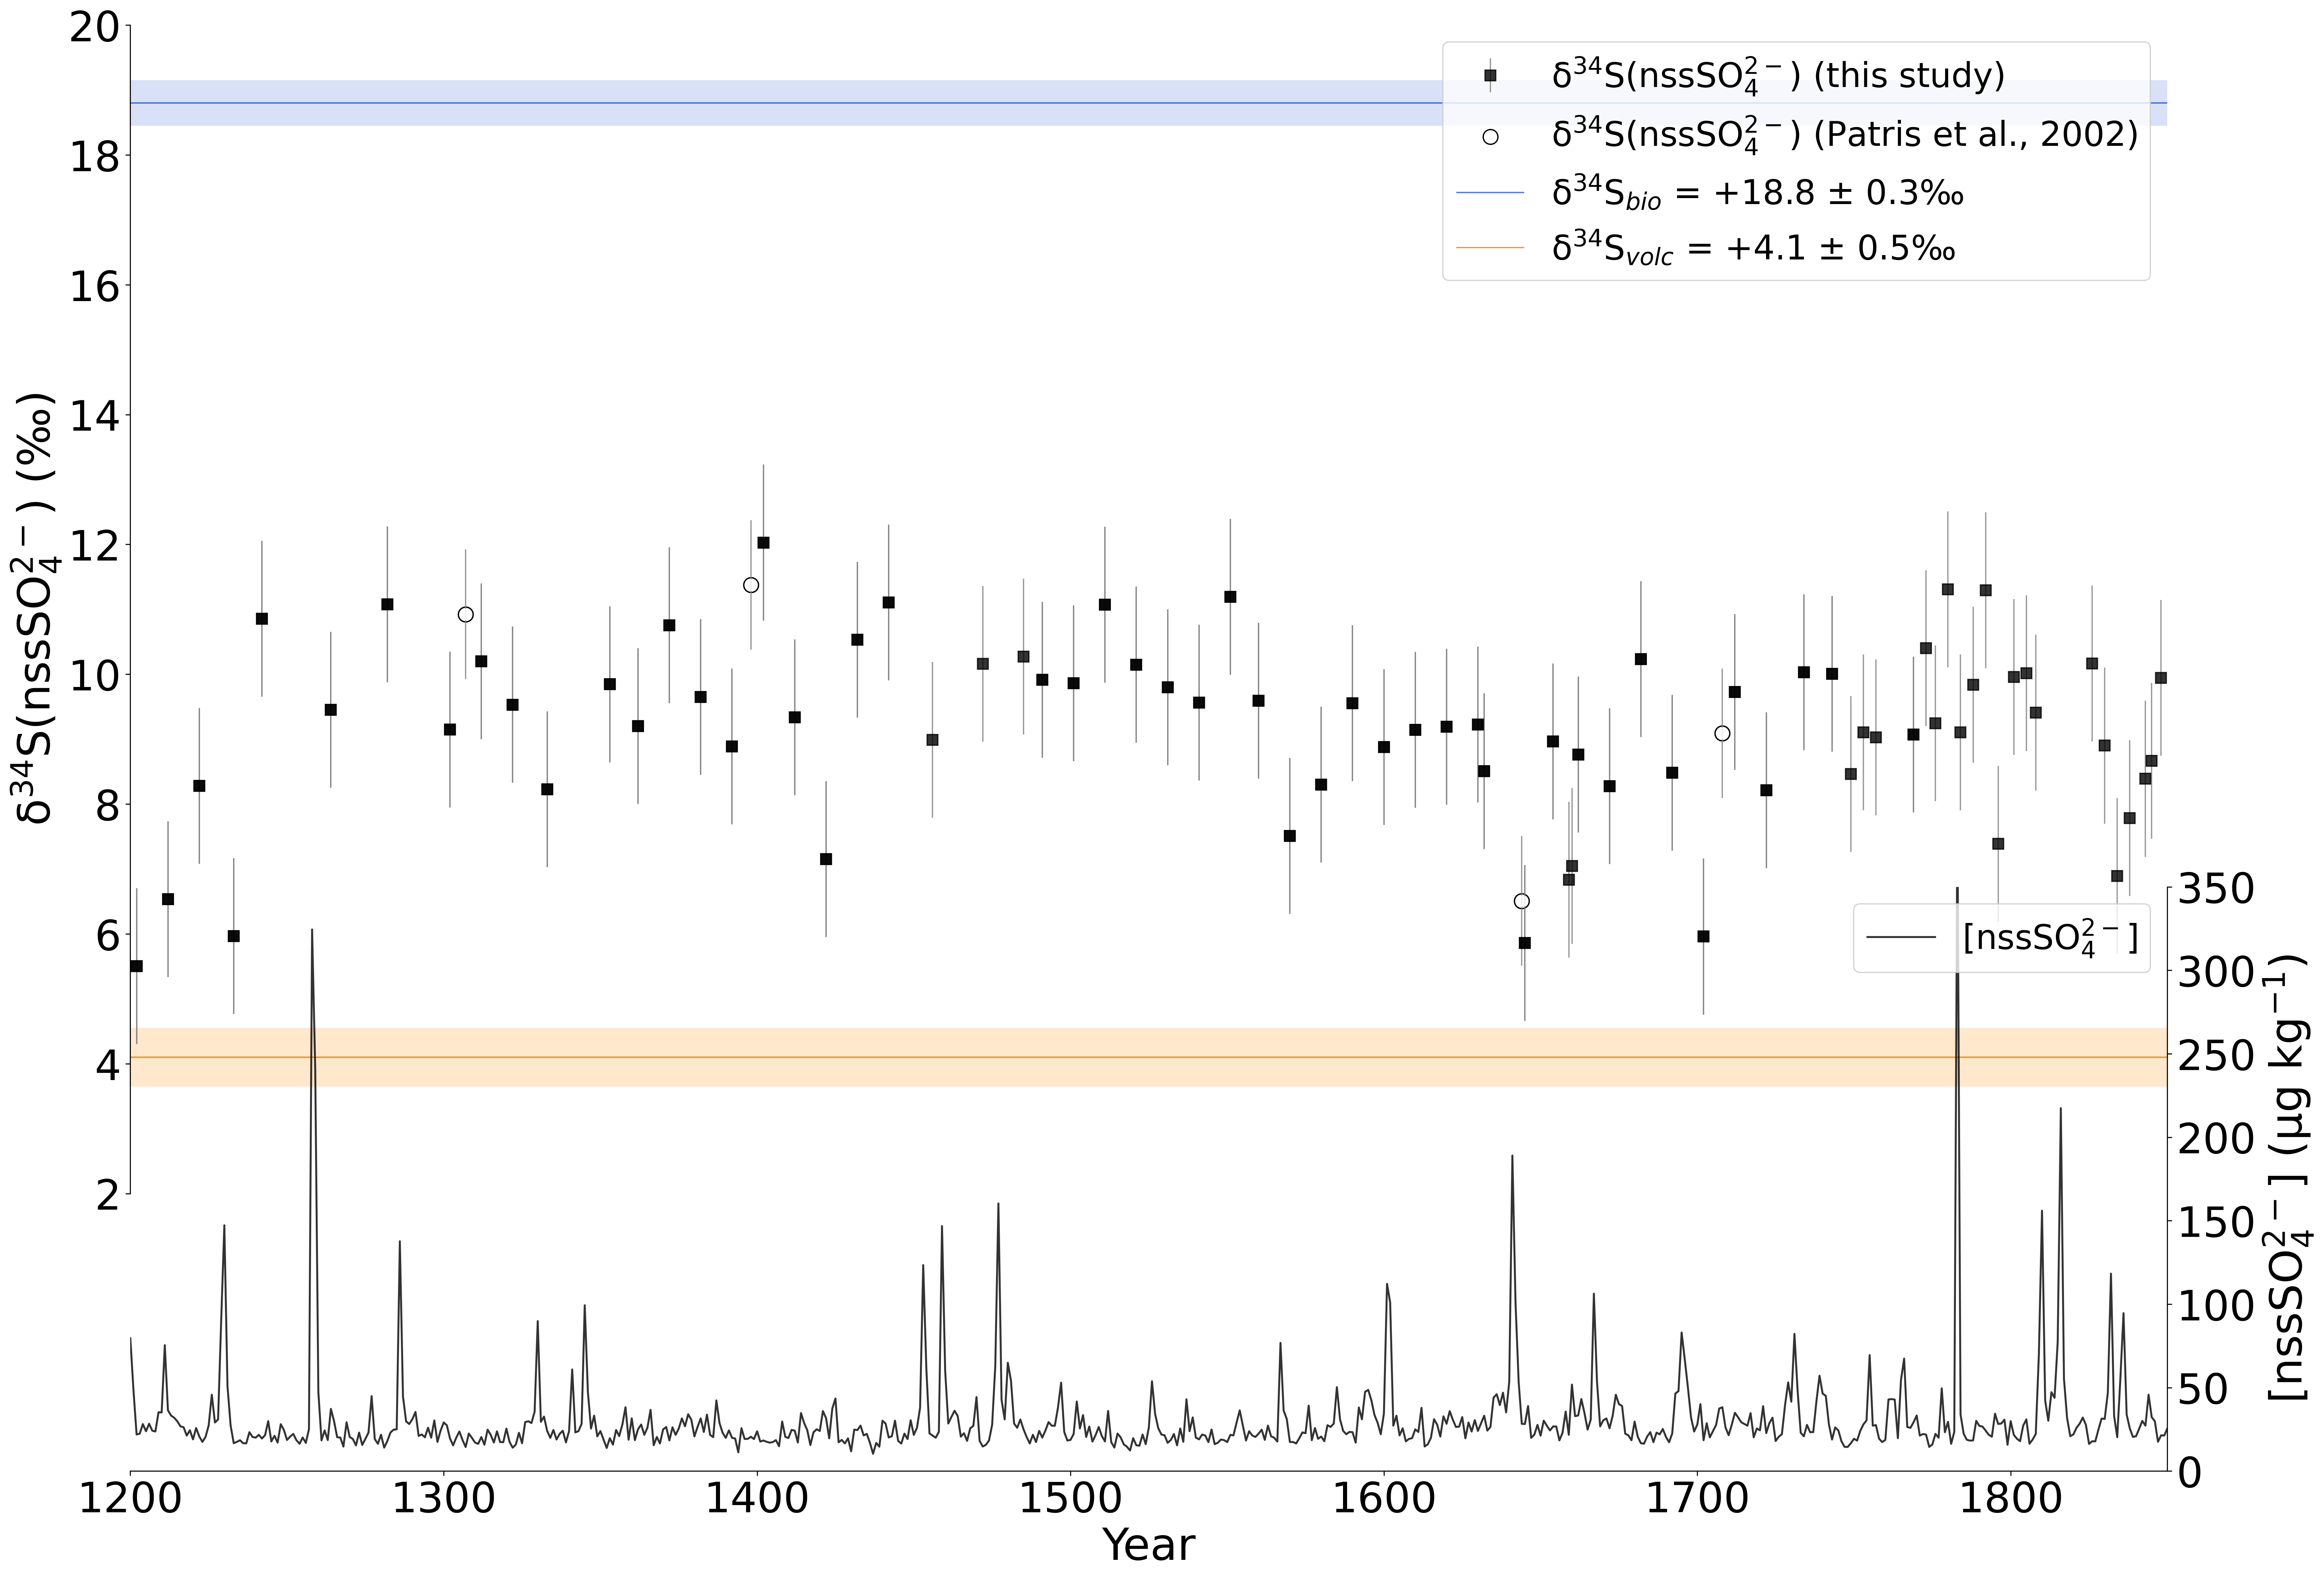

In [56]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=[28,20],gridspec_kw={'height_ratios': [3, 1.5]},dpi=300)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=-0.35)
j=34

for i in range(0,2,1):
    ax[i].patch.set_facecolor('white')
    ax[i].patch.set_alpha(0)

size = 12
s = 200
line=2
meanline=3
m=8
# ax[0].errorbar(double_yr,double_d34S,process_std_std,fmt='s',color='k',ecolor='gray',markersize=m,linewidth=1,alpha=0.8,label ='δ$^{34}$S(nssSO$_4^{2-}$) (this study)')
# ax[0].errorbar(single_yr,single_d34S,process_std_std,fmt='s',color='k',ecolor='gray',markersize=m,linewidth=1,alpha=0.8)
ax[0].errorbar(double_yr,double_d34S,process_std_std,fmt='s',color='k',ecolor='gray',markersize=m,linewidth=1,alpha=0.8)
ax[0].errorbar(single_yr,single_d34S,process_std_std,fmt='s',color='k',ecolor='gray',markersize=m,linewidth=1,alpha=0.8)
ax[0].scatter(patris_yr[5:],patris02_pi_d34S,marker='o',color='white',edgecolor='k',s=m**2*2,alpha=1,label ='δ$^{34}$S(nssSO$_4^{2-}$) (Patris et al., 2002)')
ax[0].errorbar(patris_yr[5:],patris02_pi_d34S,1,fmt='o',color='white',ecolor='gray',markersize=m,linewidth=1,alpha=0.8)
ax[0].scatter(patris_yr[:5],patris02_pd_d34S,marker='o',color='white',edgecolor='k',s=m**2*2,alpha=1)
ax[0].errorbar(patris_yr[:5],patris02_pd_d34S,1,fmt='o',color='white',ecolor='gray',markersize=m,linewidth=1,alpha=0.8)
ax[0].hlines(4.1,1200,2010,linestyles = '-',color = 'darkorange',linewidth = 45,alpha=0.2)
ax[0].hlines(18.8,1200,2010,linestyles = '-',color = 'royalblue',linewidth = 35,alpha=0.2)
ax[0].hlines(4.1,1200,2010,linestyles = '-',color = 'darkorange',linewidth = 1,alpha=0.9,label='δ$^{34}$S$_{volc}$ = +4.1 ± 0.5‰')
ax[0].hlines(18.8,1200,2010,linestyles = '-',color = 'royalblue',linewidth = 1,alpha=0.9,label='δ$^{34}$S$_{bio}$ = +18.8 ± 0.3‰')

p1 = ax[0].errorbar(double_yr,double_d34S,process_std_std,fmt='s',color='k',ecolor='gray',markersize=m,linewidth=1,alpha=0.8,label ='δ$^{34}$S(nssSO$_4^{2-}$) (this study)')
# p2 = ax[0].errorbar(patris_yr[5:],patris02_pi_d34S,1,fmt='o',color='k',ecolor='gray',markersize=m,linewidth=1,alpha=0.8,label ='δ$^{34}$S(nssSO$_4^{2-}$) (Patris et al., 2002)')
p2 = ax[0].scatter(patris_yr[5:],patris02_pi_d34S,marker='o',color='white',edgecolor='k',s=m**2*2,alpha=1,label ='δ$^{34}$S(nssSO$_4^{2-}$) (Patris et al., 2002)')
p3 = ax[0].hlines(18.8,1200,2010,linestyles = '-',color = 'royalblue',linewidth = 1,alpha=0.9,label='δ$^{34}$S$_{bio}$ = +18.8 ± 0.3‰')
p4 = ax[0].hlines(4.1,1200,2010,linestyles = '-',color = 'darkorange',linewidth = 1,alpha=0.9,label='δ$^{34}$S$_{volc}$ = +4.3 ± 0.5‰')
l0 = ax[0].legend([p1,p2,p3,p4], ['δ$^{34}$S(nssSO$_4^{2-}$) (this study)','δ$^{34}$S(nssSO$_4^{2-}$) (Patris et al., 2002)',
                           'δ$^{34}$S$_{bio}$ = +18.8 ± 0.3‰','δ$^{34}$S$_{volc}$ = +4.1 ± 0.5‰'],loc='upper right',fontsize=j-8)
# l1 = ax[0].legend([p1,p2], ['δ$^{34}$S(nssSO$_4^{2-}$) (this study)','δ$^{34}$S(nssSO$_4^{2-}$) (Patris et al., 2002)',],loc='upper right',fontsize=j-8)

# ax[0].text(1200,4.5,"δ$^{34}$S$_{volc}$ = +4.3 ± 0.5‰", fontsize=j-6,alpha=1)
# ax[0].text(1200,18.9,"δ$^{34}$S$_{bio}$ = +18.8 ± 0.3‰", fontsize=j-6,alpha=1)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].axes.get_xaxis().set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

ax[1].plot(nssSO4_1yr.index,nssSO4_1yr.values,color='k',linewidth=1.5,alpha=0.8,label='[nssSO$_4^{2-}$]')


ax[1].legend(loc='upper right',fontsize=j-8)

ax[0].tick_params(labelsize= j-2)
ax[1].tick_params(labelsize= j-2)

ax[0].set_ylabel('δ$^{34}$S(nssSO$_4^{2-}$) (‰)',fontsize=j)
ax[1].set_ylabel('[nssSO$_4^{2-}$] (µg kg$^{-1}$)',fontsize=j)
ax[1].set_xlabel('Year',fontsize=j)
ax[0].set_xlim([1200,1850])
ax[1].set_xlim([1200,1850])
ax[0].set_ylim([2,20])
ax[1].set_ylim([0,350])

# plt.show()

# fig.savefig('/home/cindylou/ujongebl/Notebooks/VolcanicS_GC_results/Fig1.pdf')

Text(-0.06, 1.07, 'b')

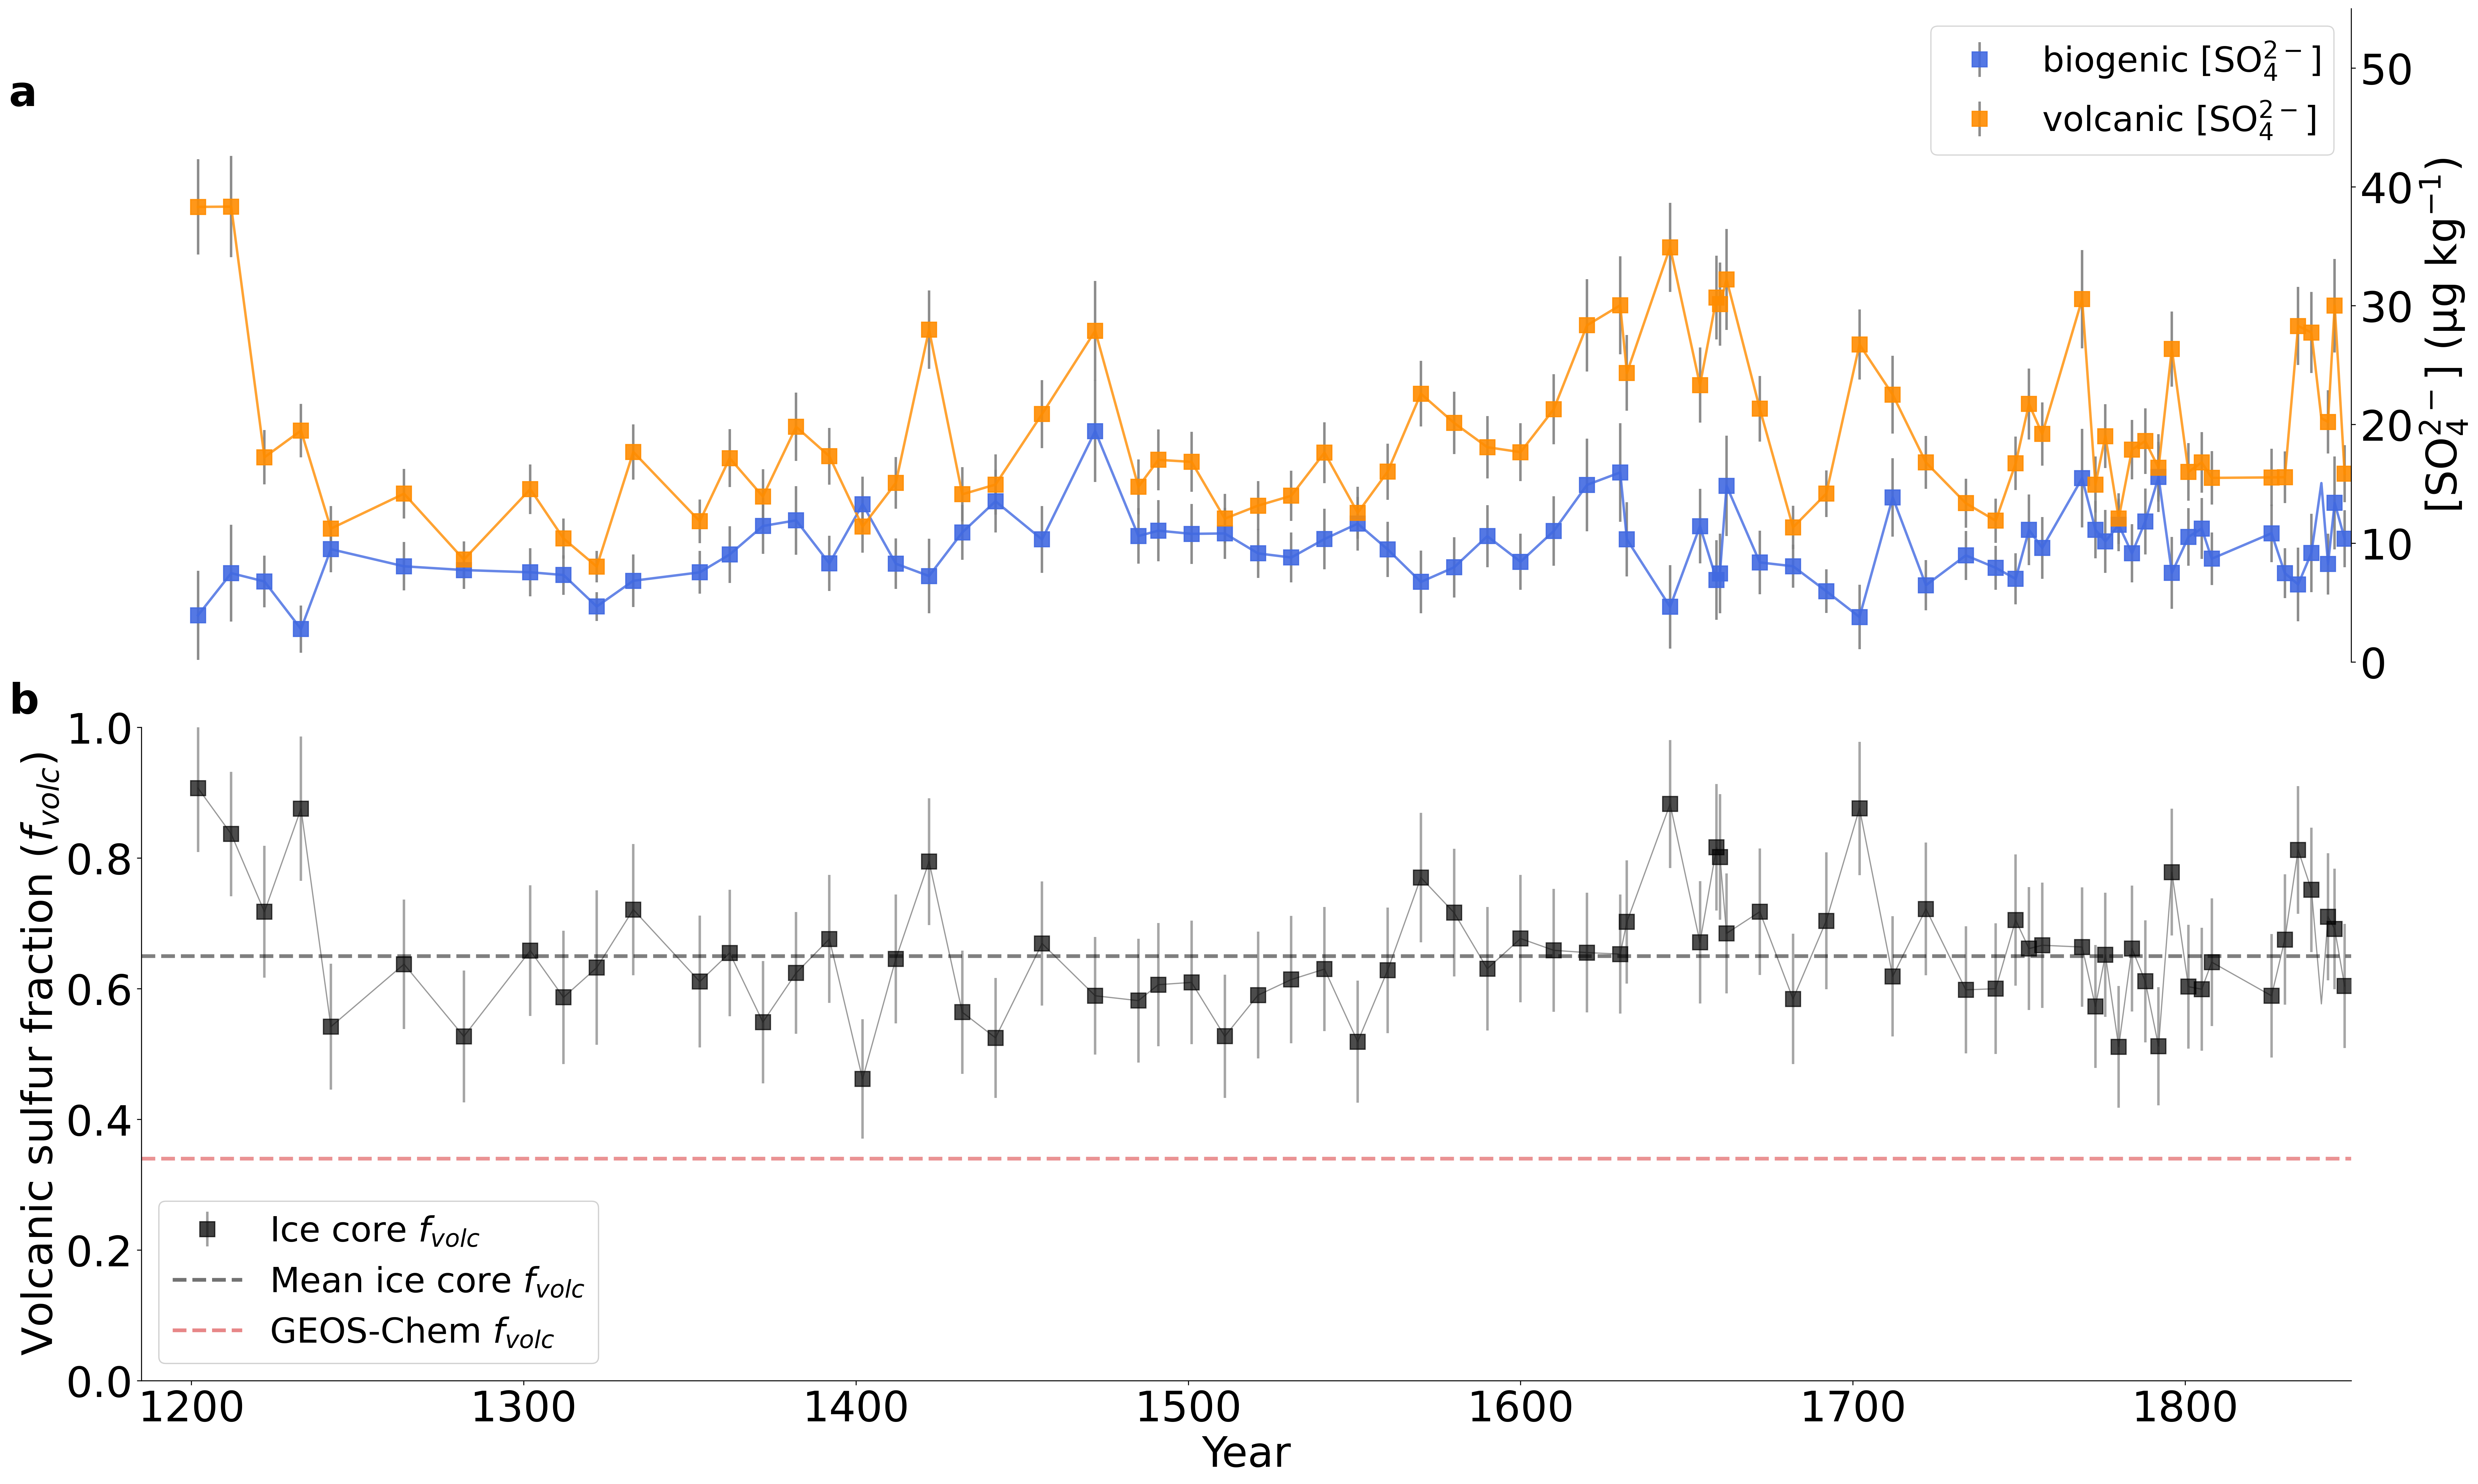

In [57]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=[32,20],sharex=True,dpi=300)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
j=34

for i in range(0,2,1):
    ax[i].patch.set_facecolor('white')
    ax[i].patch.set_alpha(0)

ax[0].set_ylabel('[SO$_4^{2-}$] (µg kg$^{-1}$)',fontsize=j)
ax[1].set_ylabel('Volcanic sulfur fraction ($f_{volc}$)',fontsize=j)
ax[1].set_xlabel('Year',fontsize=j)
ax[0].set_xlim([1185,1850])
ax[1].set_xlim([1185,1850])
ax[0].set_ylim([0,55])
ax[1].set_ylim([0,1.0])

size = 12
s = 200
line=2
meanline=3
ax[0].errorbar(bioSO4_pre[ice_core.Sample_length==1].index,bioSO4_pre[ice_core.Sample_length==1].values,sigma_bio_pre[ice_core.Sample_length==1],fmt='s',markersize=size,color='royalblue',ecolor='gray',linewidth=line,label='biogenic [SO$_4^{2-}$]',alpha=0.9)
ax[0].errorbar(bioSO4_pre[ice_core.Sample_length==2].index,bioSO4_pre[ice_core.Sample_length==2].values,sigma_bio_pre[ice_core.Sample_length==2],fmt='s',markersize=size,color='royalblue',ecolor='gray',linewidth=line,alpha=0.9)
ax[0].errorbar(volcSO4_pre[ice_core.Sample_length==1].index,volcSO4_pre[ice_core.Sample_length==1].values,sigma_volc_pre[ice_core.Sample_length==1],fmt='s',markersize=size,color='darkorange',ecolor='gray',linewidth=line,label='volcanic [SO$_4^{2-}$]',alpha=0.9)
ax[0].errorbar(volcSO4_pre[ice_core.Sample_length==2].index,volcSO4_pre[ice_core.Sample_length==2].values,sigma_volc_pre[ice_core.Sample_length==2],fmt='s',markersize=size,color='darkorange',ecolor='gray',linewidth=line,alpha=0.9)

ax[0].plot(bioSO4_pre.index,bioSO4_pre,color='royalblue',linewidth=line,alpha=0.8)
ax[0].plot(bioSO4_ind.index,bioSO4_ind,color='royalblue',linewidth=line,alpha=0.8)
ax[0].plot(volcSO4_pre.index,volcSO4_pre,color='darkorange',linewidth=line,alpha=0.8)
ax[0].plot(bioSO4_ind.index,volcSO4_ind,color='darkorange',linewidth=line,alpha=0.8)

ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].axes.get_xaxis().set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].yaxis.tick_right()
ax[0].yaxis.set_label_position("right")

ax[1].plot(volcSO4_pre.index,volcfracs,color='k',linewidth=1,alpha=0.4)
p1 = ax[1].errorbar(volcSO4_pre[ice_core.Sample_length==2].index,volcfracs[ice_core.Sample_length==2].values,sigma_vf[ice_core.Sample_length==2],lw=line,fmt='s',color='k',ecolor='gray',markersize=size,alpha=0.7,ls='none',label='Ice core f$_{volc}$')
p2 = ax[1].errorbar(volcSO4_pre[ice_core.Sample_length==1].index,volcfracs[ice_core.Sample_length==1].values,sigma_vf[ice_core.Sample_length==1],lw=line,fmt='s',color='k',ecolor='gray',markersize=size,alpha=0.7,ls='none')

p4 = ax[1].hlines(0.34, xmin=1185,xmax=1850,color='tab:red',linewidth=meanline,linestyle='--',alpha=0.5,label='GEOS-Chem f$_{volc}$')
p5 = ax[1].hlines(0.65, xmin=1185,xmax=1850,color='k',linewidth=meanline,linestyle='--',alpha=0.5,label='Mean ice core f$_{volc}$ with δ$^{34}$S$_V$ from Keeling plot')
# p6 = ax[1].hlines(0.61, xmin=1200,xmax=1850,color='indigo',linewidth=meanline,linestyle='--',alpha=0.5,label='Mean ice core f$_{volc}$ with δ$^{34}$S$_V$ from volcanic gas and ash observations')

ax[0].legend(loc='upper right',fontsize=j-6)
# l1 = legend([p1], ['Ice core $f_{volc}$'],loc='upper right',fontsize=j-2)
# l2 = legend([p4,p5,p6],['GEOS-Chem $f_{volc}$','Mean ice core $f_{volc}$ with with δ$^{34}$S$_{volc}$ from Keeling plot','Mean ice core $f_{volc}$ with δ$^{34}$S$_{volc}$ from volcanic gas and ash observations'], loc='lower right',fontsize=j-2)
l2 = legend([p1,p5,p4],['Ice core $f_{volc}$','Mean ice core $f_{volc}$','GEOS-Chem $f_{volc}$'], loc='lower left',fontsize=j-6)
# gca().add_artist(l1)
gca().add_artist(l2)


ax[0].tick_params(labelsize= j-2)
ax[1].tick_params(labelsize= j-2)



for i, label in enumerate(('A', 'B')):
    ax[i].tick_params(labelsize=j)

ax[0].text(-0.06, 0.9, 'a', transform=ax[0].transAxes,fontsize=j, fontweight='bold', va='top')
ax[1].text(-0.06, 1.07, 'b', transform=ax[1].transAxes,fontsize=j, fontweight='bold', va='top')

# fig.savefig('/home/cindylou/ujongebl/Notebooks/VolcanicS_GC_results/Fig2.pdf')

### Investigating Terrestrial Sulfur

Based on Uemura et al. (2021) considering dust sulfate and the other nss source

"We used a (Na+/Ca2+)nss value of 1.6 (0.94 for the mass ratio) and a (Na+/Ca2+)ss value of 40 (from 23 for the mass ratio) based on exceptionally high Ca2+ and Na+ peaks in ice core data"


In [58]:
naca_mr = 40
ice_ca = ice_core.calcium
ice_na = ice_core.sodium

# I don't think this c makes a lot of sense...
c = ((1 - 1.6 * (naca_mr)**-1))**-1

# nss calcium and ss calcium. 
# sea salt is a very small contributor to calcium, about 1% on average
nss_ca = (ice_ca - ice_na / naca_mr)
ss_ca = ice_ca - nss_ca

[ter-SO4] = m[nss-Ca]

where [nss-Ca2+] indicates the concentration of nss-Ca2+ and m denotes the SO2−/Ca2+ ratio of terrestrial dust. An m value of 0.06-0.08 (in molar ratio), which is a mean soil value (Bowen, 1979), was commonly adopted in previous polar studies (e.g., Alexander et al., 2003; Kunasek et al., 2010; Legrand et al., 1997; Patris et al., 2002). A higher value of 0.21, based on aerosols in the Sahara, was used for other Antarctica ice core analyses (Kaufmann et al., 2010). A low m value results in a small terrestrial fraction of sul- fate, fter (ca. 0-21%), even in the glacial period. The largest value of m proposed is 1.0 (i.e., all [nss-Ca2+] originated from CaSO4), which is empirically derived from the upper limit of the DF core data (Goto-Azuma et al., 2019). It is difficult to estimate ideal m for DF accurately because it is ultimately a contribution-weighted av- erage of m from multiple aerosol origins for the DF core. Here, to test the large terrestrial contribution hypothesis, we first assume that m is 1.

Ursula comment: them assuming m is 1 is a pretty insanely large value... basically assuming that all calcium from dust in ice core is from calcium sulfate (i.e. gypsum) dust. Seems unlikely given that calcium is a significant constituent of calcite and plagioclase (I think)


In [59]:
m = 0.06

terr_SO4 = m*nss_ca
np.mean(terr_SO4.values[0:91]/nssSO4.values[0:91])*100

2.1427407932331644

## Testing different values for d34Sv

In [60]:
#Isotopic source signatures
error = Sb
# error = 0.4
v = 4.1 # based on monte carlo regression
# v = 1.4 # testing different value # WITH THIS VALUE MEAN FVOLC=0.50
# v = 0 # testing different value # WITH THIS VALUE MEAN FVOLC=0.46
d34Sv=np.array([v-Sb,v,v+Sb])
d34Sb=np.array([18.5,18.8,19.1]) # Based on Patris et al. (2000)
d34Sa=np.array([gm_int-Sb_anth,gm_int,gm_int+Sb_anth]) # based on keeling plot above


# PREINDUSTRIAL
fb_pre=(d34S_pre-d34Sv[1])/(d34Sb[1]-d34Sv[1])
fb_low_pre=(d34S_pre-d34Sv[2])/(d34Sb[2]-d34Sv[2])
fb_high_pre=(d34S_pre-d34Sv[0])/(d34Sb[0]-d34Sv[0])

bioSO4_pre = fb_pre*nssSO4_pre
bioSO4_low_pre = fb_low_pre*nssSO4_pre
bioSO4_high_pre = fb_high_pre*nssSO4_pre

volcSO4_pre = (1-fb_pre)*nssSO4_pre
volcSO4_low_pre = (1-fb_high_pre)*nssSO4_pre
volcSO4_high_pre = (1-fb_low_pre)*nssSO4_pre
# volcSO4_old_median = np.median((1-fb_pre[fb_pre.index<1750])*nssSO4_pre2[nssSO4_pre2.index<1750])

double_volc = volcSO4_pre[ice_core.Sample_length==2].values
single_volc = volcSO4_pre[ice_core.Sample_length==1].values

double_bio = bioSO4_pre[ice_core.Sample_length==2].values
single_bio = bioSO4_pre[ice_core.Sample_length==1].values
all_volc = np.hstack([double_volc,double_volc,single_volc])
all_bio = np.hstack([double_bio,double_bio,single_bio])

volc_fracs_wtd = np.hstack([double_volc,double_volc,single_volc])/np.hstack([double_volc+double_bio,double_volc+double_bio,single_volc+single_bio])

nyears = len(double_bio)*2 + len(single_bio)

median_frac = np.nanmedian(np.hstack([(double_volc/(double_volc+double_bio)), (double_volc/(double_volc+double_bio)), (single_volc/(single_volc+single_bio))]))
mean_frac = np.nanmean(volc_fracs_wtd) #np.mean(np.hstack([(double_volc/(double_volc+double_bio)), (double_volc/(double_volc+double_bio)), (single_volc/(single_volc+single_bio))]))

print('Mean volcanic fraction after correcting for 2-yr and 1-yr samples:',np.round(mean_frac,2))
print('Median volcanic fraction after correcting for 2-yr and 1-yr samples:',np.round(median_frac,2))
print('std deviation volcanic fraction after correcting for 2-yr and 1-yr samples',np.round(np.nanstd(volc_fracs_wtd),2))
print('mean volcanic fraction after correcting for 2-yr and 1-yr samples',np.round(np.nanmean(volc_fracs_wtd),2))

Mean volcanic fraction after correcting for 2-yr and 1-yr samples: 0.66
Median volcanic fraction after correcting for 2-yr and 1-yr samples: 0.65
std deviation volcanic fraction after correcting for 2-yr and 1-yr samples 0.1
mean volcanic fraction after correcting for 2-yr and 1-yr samples 0.66


## Quantifying uncertainty on fvolc using prior studies of d34Sv

Mean:   3.2
Median: 3.4
Std:    4.17
Min:    -14.4
Max:    13.9


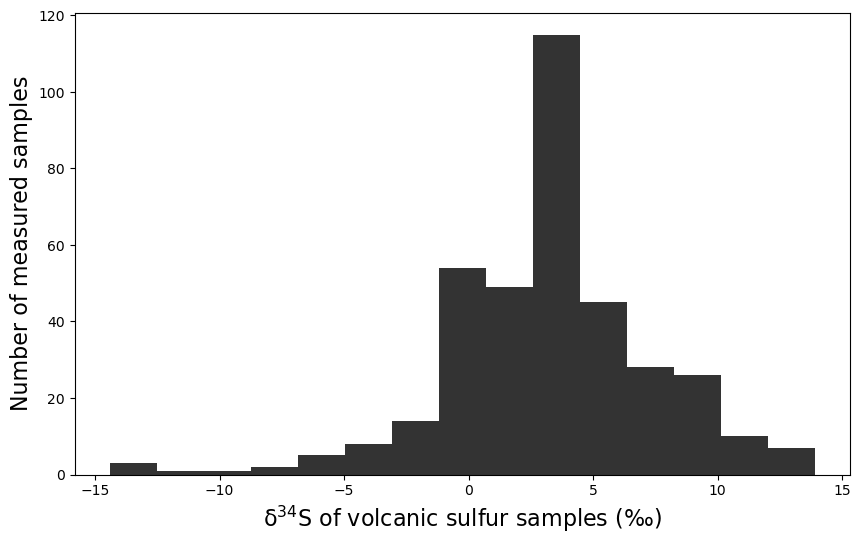

In [61]:
d34Sv_histogram = pd.read_excel('./isotope_signature_data/d34Sv_histogram3.xlsx')
d34Sv_insitu = d34Sv_histogram['d34Sv (permille)']
plt.figure(figsize=[10,6])
plt.hist(d34Sv_insitu, bins=15,color='k',alpha=0.8)
plt.ylabel('Number of measured samples',fontsize=16)
plt.xlabel('δ$^{34}$S of volcanic sulfur samples (‰)',fontsize=16)
print('Mean:  ',round(np.mean(d34Sv_insitu),2))
print('Median:',round(np.nanmedian(d34Sv_insitu),2))
print('Std:   ',round(np.std(d34Sv_insitu),2))
print('Min:   ',round(np.min(d34Sv_insitu),2))
print('Max:   ',round(np.max(d34Sv_insitu),2))

Mean:   19.23
Median: 19.5
Std:    1.91
Min:    10.6
Max:    23.6


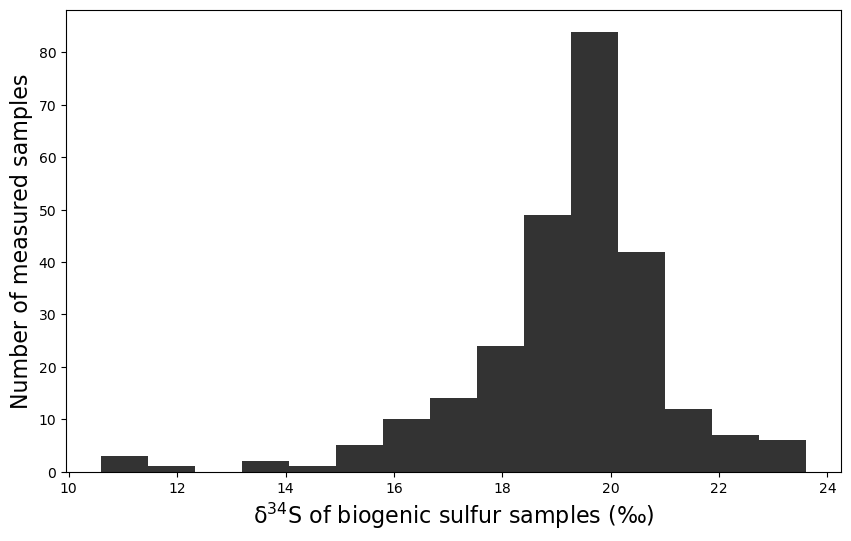

In [62]:
d34Sb_histogram = pd.read_excel('./isotope_signature_data/d34Sb_histogram.xlsx')
d34Sb_insitu = d34Sb_histogram['d34Sb (permille)']
plt.figure(figsize=[10,6])
plt.hist(d34Sb_insitu, bins=15,color='k',alpha=0.8)
plt.ylabel('Number of measured samples',fontsize=16)
plt.xlabel('δ$^{34}$S of biogenic sulfur samples (‰)',fontsize=16)
print('Mean:  ',round(np.mean(d34Sb_insitu),2))
print('Median:',round(np.median(d34Sb_insitu),2))
print('Std:   ',round(np.std(d34Sb_insitu),2))
print('Min:   ',round(np.min(d34Sb_insitu),2))
print('Max:   ',round(np.max(d34Sb_insitu),2))

In [63]:
d34Sb_byloc = d34Sb_histogram.groupby('Location')['d34Sb (permille)'].mean()
d34Sb_only_SO4 = (d34Sb_histogram.loc[d34Sb_histogram.Sulfur == 'nssSO4']).groupby('Location')['d34Sb (permille)'].mean()

print('Mean d34Sb by location all samples:',round(np.mean(d34Sb_byloc.values),2))
print('Mean d34Sb by location only nssSO4:',round(np.nanmean(d34Sb_only_SO4),2))

Mean d34Sb by location all samples: 18.83
Mean d34Sb by location only nssSO4: 17.25


In [64]:
d34Sv_noSO4 = (d34Sv_histogram.loc[d34Sv_histogram.Sulfur != 'SO4'])['d34Sv (permille)']
d34Sv_byvolc = d34Sv_histogram.groupby('Volcano Source')['d34Sv (permille)'].mean()
d34Sv_noSO4_byvolc = (d34Sv_histogram.loc[d34Sv_histogram.Sulfur != 'SO4']).groupby('Volcano Source')['d34Sv (permille)'].mean()

print('Mean d34Sv no SO4 by volcano: ',round(np.mean(d34Sv_noSO4_byvolc.values),2))
print('Mean d34Sv all S  by volcano: ',round(np.mean(d34Sv_byvolc.values),2))
print('Mean d34Sv no SO4 all samples:',round(np.mean(d34Sv_noSO4),2))

Mean d34Sv no SO4 by volcano:  2.4
Mean d34Sv all S  by volcano:  3.82
Mean d34Sv no SO4 all samples: 2.54


In [65]:
d34Sv_byvolc

Volcano Source
Akutan                               -4.033333
Anahatan                              3.300000
Ardoukoba                            -2.314286
Avachinsky                            3.700000
Baker                                -9.800000
Bezymyanny                            6.800000
Cumbal                                2.233333
El Chichon                            5.800000
Erta Ale                             -0.472632
Gjalp Iceland                         5.650000
Kawah Ijen                            0.950000
Kilauea                               1.731250
Krafla                                0.400000
Kuyu                                  8.950000
Makushin                              1.050000
Masaya                                6.526667
Mayon (1–9 May 1968)                  7.500000
Mt Etna                               1.822222
Mt Hood                               5.000000
Mt Shasta                             3.800000
Mt Spurr Alaska                      10.83333

In [66]:
print('Mean SO4 d34S:  ',np.round(np.mean((d34Sv_histogram.loc[d34Sv_histogram.Sulfur == 'SO4']).groupby(
    'Volcano Source')['d34Sv (permille)'].mean()),2))
print('Mean SO2 d34S:  ',np.round(np.mean((d34Sv_histogram.loc[d34Sv_histogram.Sulfur == 'SO2']).groupby(
    'Volcano Source')['d34Sv (permille)'].mean()),2))
print('Mean H2S d34S:  ',np.round(np.mean((d34Sv_histogram.loc[d34Sv_histogram.Sulfur == 'H2S']).groupby(
    'Volcano Source')['d34Sv (permille)'].mean()),2))
print('Mean bulkS d34S:',np.round(np.mean((d34Sv_histogram.loc[d34Sv_histogram.Sulfur == 'S']).groupby(
    'Volcano Source')['d34Sv (permille)'].mean()),2))


Mean SO4 d34S:   7.32
Mean SO2 d34S:   5.6
Mean H2S d34S:   0.47
Mean bulkS d34S: 1.63


### Incorporate in-situ d34S instead of Keeling d34S to estimate fvolc

(1-fv) x d34Sb + fv x d34Sv = d34S_VCDT

- d34Sb - fv x d34Sb + fv x d34Sv = d34S_VCDT
- fv(d34Sv - d34Sb) = d34S_VCDT - d34Sb
- fv = (d34S_VCDT - d34Sb) / (d34Sv - d34Sb)

Loop through all vals of d34Sv_insitu to get 201 values of fv for each d34S_VCDT sampled.

Get overall average and also plot histogram

Eventually plot all values on each sample as in Figure 2 from main text

In [67]:
n=1000
d34Sv_sample = d34Sv_byvolc
d34Sb_sample = d34Sb_byloc
x = len(d34Sv_sample)
y = len(d34Sb_sample)
d34Sv_boot = np.zeros(n)
d34Sb_boot = np.zeros(n)
for i in range(0,n):
    randomList_d34Sv = [random.randint(0,x-1) for j in range(x-1)]
    randomList_d34Sb = [random.randint(0,y-1) for j in range(y-1)]
    d34Sv_boot[i] = np.mean(d34Sv_sample[randomList_d34Sv])
    d34Sb_boot[i] = np.mean(d34Sb_sample[randomList_d34Sb])

Mean d34Sv:   3.82
Median d34Sv: 3.8
Std d34Sv:    4.46
Min d34Sv:    -9.8
Max d34Sv:    11.8
N:      39
Mean d34Sb:   18.83
Median d34Sb: 19.3
Std d34Sb:    1.33
Min d34Sb:    15.6
Max d34Sb:    21.11
N:      17
Mean d34Sv:   3.8
Median d34Sv: 3.84
Std d34Sv:    0.71
Min d34Sv:    1.4
Max d34Sv:    5.95
N:            1000
Mean d34Sb:   18.82
Median d34Sb: 18.82
Std d34Sb:    0.33
Min d34Sb:    17.63
Max d34Sb:    19.89
N:      1000


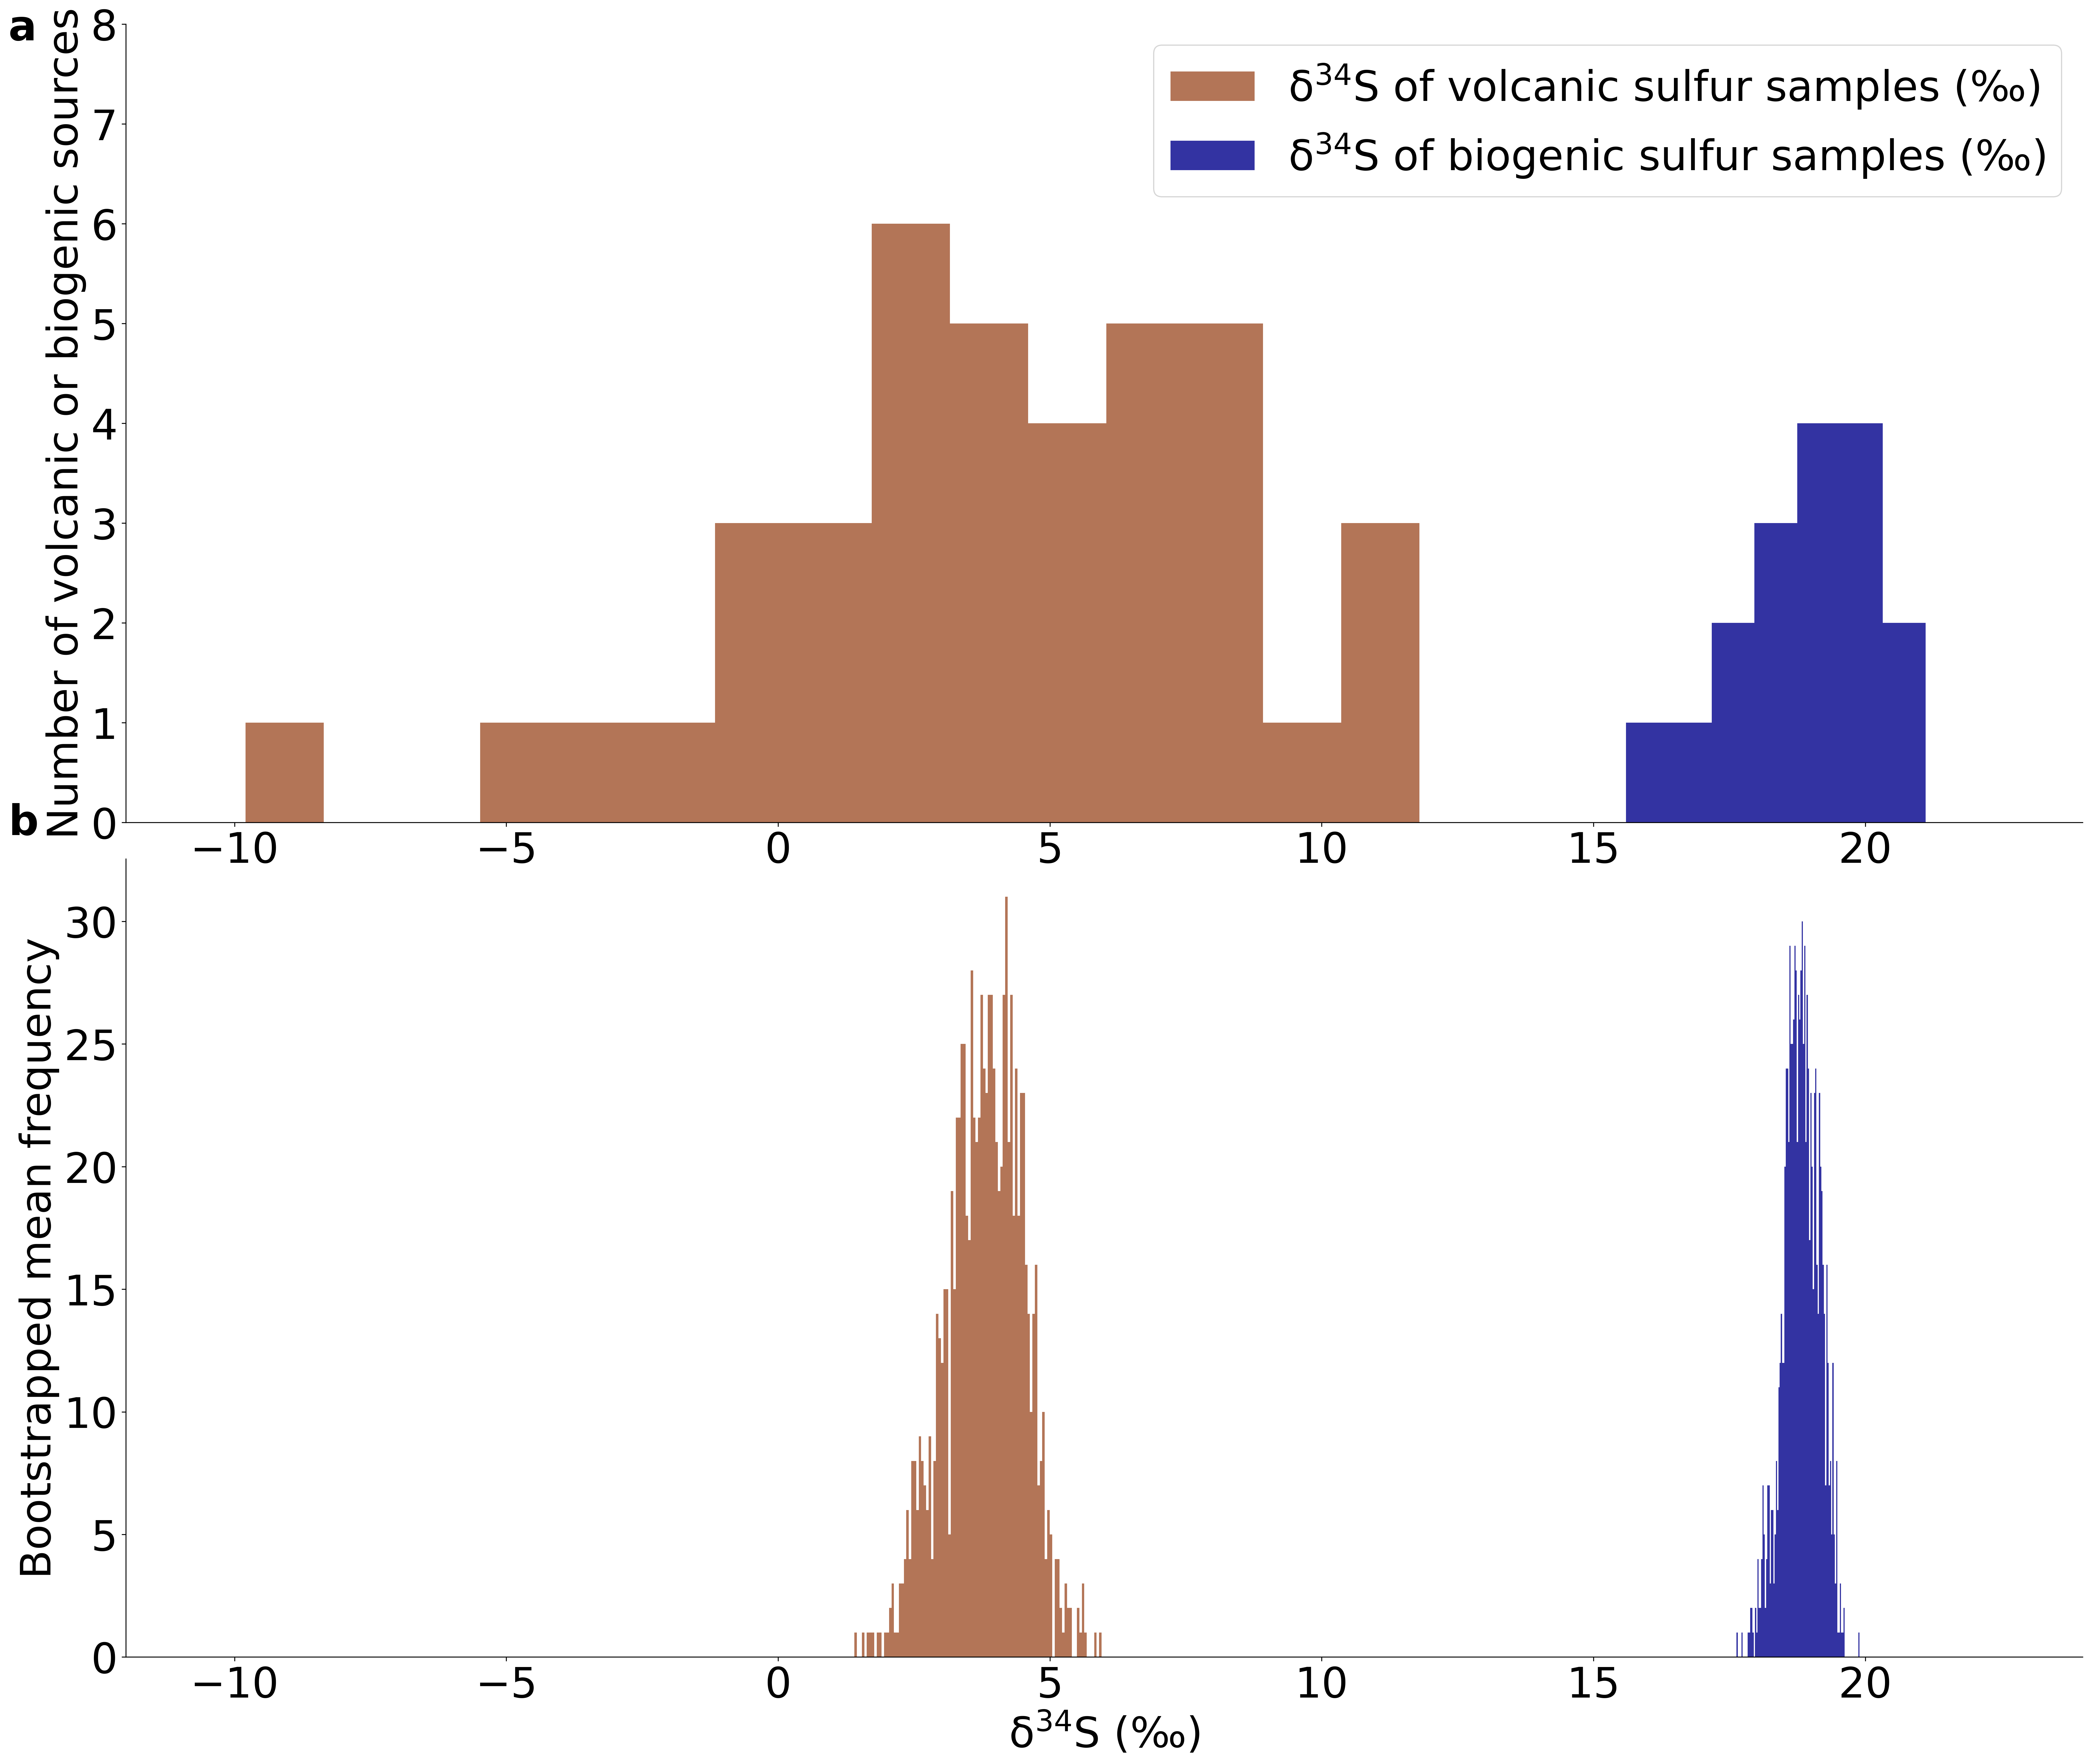

In [68]:
fig,ax = plt.subplots(nrows=2,figsize=[24,20],dpi=300)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=5)
plt.tight_layout()
j=36
x = d34Sv_byvolc

for i in range(0,2,1):
    ax[i].patch.set_facecolor('white')
    ax[i].patch.set_alpha(0)

ax[0].hist(x, bins=15,color='sienna',alpha=0.8,label='δ$^{34}$S of volcanic sulfur samples (‰)')
ax[0].set_ylabel('Number of volcanic sources',fontsize=j)
ax[0].set_ylim([0,8])
ax[0].set_xlim([-12,24])
# ax[0].set_xlabel('δ$^{34}$S of volcanic sources (‰)',fontsize=j)
# ax[0].set_xticklabels(['-10','-5','0','5','10','15','20'],fontsize=j)
# ax[0].set_yticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=j)
# ax.axes.get_xaxis().set_visible(False)

print('Mean d34Sv:  ',round(np.mean(x),2))
print('Median d34Sv:',round(np.median(x),2))
print('Std d34Sv:   ',round(np.std(x),2))
print('Min d34Sv:   ',round(np.min(x),2))
print('Max d34Sv:   ',round(np.max(x),2))
print('N:     ',len(x))

x = d34Sb_byloc
ax[0].hist(x, bins=7,color='darkblue',alpha=0.8,label='δ$^{34}$S of biogenic sulfur samples (‰)')
ax[0].set_ylabel('Number of volcanic or biogenic sources',fontsize=j)
ax[0].set_ylim([0,8])
ax[0].set_xlim([-12,24])
# ax[0].axes.get_xaxis().set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# ax[0].set_xlabel('δ$^{34}$S of in-situ sulfur samples (‰)',fontsize=j)
# ax[0].set_xticklabels(['-10','-5','0','5','10','15','20'],fontsize=j)
# ax[0].set_yticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=j)
# ax[1].axes.get_yaxis().set_visible(False)

ax[0].legend(loc='upper right',fontsize=j)

print('Mean d34Sb:  ',round(np.mean(x),2))
print('Median d34Sb:',round(np.median(x),2))
print('Std d34Sb:   ',round(np.std(x),2))
print('Min d34Sb:   ',round(np.min(x),2))
print('Max d34Sb:   ',round(np.max(x),2))
print('N:     ',len(x))

ax[1].hist(d34Sb_boot, bins=100,color='darkblue',alpha=0.8,label='Bootstrap based on direct measurements of δ$^{34}$S')
ax[1].hist(d34Sv_boot, bins=100,color='sienna',alpha=0.8,label='Bootstrap based on direct measurements of δ$^{34}$S')
ax[1].set_xlim([-12,24])
ax[1].set_ylabel('Bootstrapped mean frequency',fontsize=j)
ax[1].axvline(x=34,color='red',linestyle=':')
ax[1].axvline(x=28,color='red',linestyle=':',label='GEOS-Chem preindustrial simulation')
# ax[1].set_xticklabels(['-10','-5','0','5','10','15','20'],fontsize=j)
ax[1].set_xlabel('δ$^{34}$S (‰)',fontsize=j)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].tick_params(labelsize= j)
ax[1].tick_params(labelsize= j)
ax[0].tick_params(labelsize= j)
ax[1].tick_params(labelsize= j)

ax[0].text(-0.06, 1.02, 'a', transform=ax[0].transAxes,fontsize=j, fontweight='bold', va='top')
ax[1].text(-0.06, 1.07, 'b', transform=ax[1].transAxes,fontsize=j, fontweight='bold', va='top')


print('Mean d34Sv:  ',np.round(np.mean(d34Sv_boot),2))
print('Median d34Sv:',round(np.median(d34Sv_boot),2))
print('Std d34Sv:   ',round(np.std(d34Sv_boot),2))
print('Min d34Sv:   ',round(np.min(d34Sv_boot),2))
print('Max d34Sv:   ',round(np.max(d34Sv_boot),2))
print('N:           ',len(d34Sv_boot))

print('Mean d34Sb:  ',round(np.mean(d34Sb_boot),2))
print('Median d34Sb:',round(np.median(d34Sb_boot),2))
print('Std d34Sb:   ',round(np.std(d34Sb_boot),2))
print('Min d34Sb:   ',round(np.min(d34Sb_boot),2))
print('Max d34Sb:   ',round(np.max(d34Sb_boot),2))
print('N:     ',len(d34Sb_boot))

In [69]:
fvolc_insitu = np.zeros([len(d34S_pre),len(d34Sv_boot),len(d34Sb_boot)])

for i in range(0,len(d34S_pre)):
    for j in range(0,len(d34Sb_boot)):
        fvolc_insitu[i,:,j] = (d34S_pre.values[i] - d34Sb_boot[j]) / (d34Sv_boot - d34Sb_boot[j])
        
fvolc_dimless = fvolc_insitu.reshape(len(d34S_pre)*len(d34Sv_boot)*len(d34Sb_boot))*100
print('N = ',len(fvolc_dimless))
print('Mean:',round(np.mean(fvolc_dimless),2))
print('Median:',round(np.median(fvolc_dimless),2))
print('Std:',round(np.std(fvolc_dimless),2))
print('Min:',round(np.min(fvolc_dimless),2))
print('Max:',round(np.max(fvolc_dimless),2))

N =  75000000
Mean: 64.41
Median: 63.18
Std: 9.71
Min: 34.53
Max: 103.84


In [70]:
meanfvolcs = np.zeros([len(d34Sv_boot),len(d34Sb_boot)])

for j in range(0,len(d34Sv_boot)-1):
    for i in range(0,len(d34Sb_boot)-1):
        meanfvolcs[j,i] = np.mean(fvolc_insitu[:,j,i])


Text(0.5, 0, 'f$_{volc}$ (%)')

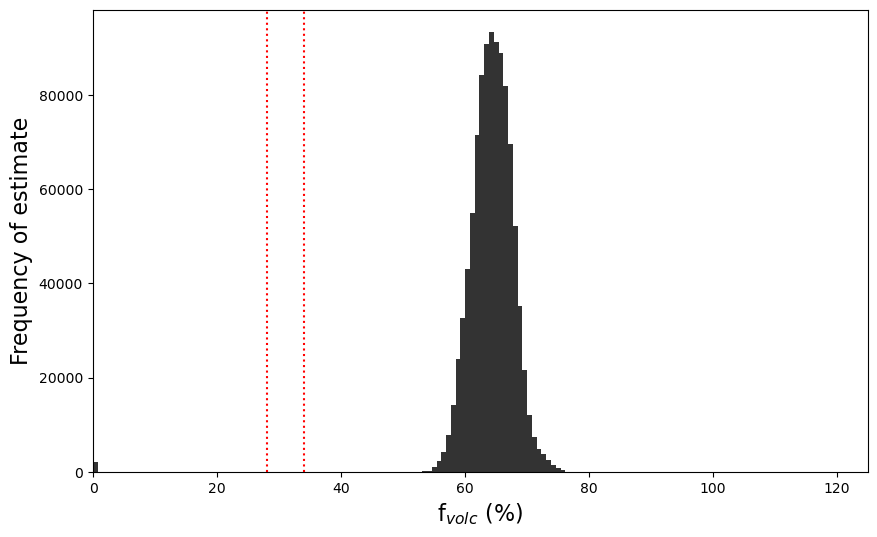

In [71]:
meanfvolcs_dimless = meanfvolcs.reshape(len(d34Sv_boot)*len(d34Sb_boot))
plt.figure(figsize=[10,6])
plt.hist(meanfvolcs_dimless*100, bins=100,color='k',alpha=0.8,label='f$_volc$ estimated based on direct measurements of δ$^{34}$S')
plt.xlim([-0.1,125])
plt.ylabel('Frequency of estimate',fontsize=16)
plt.axvline(x=28,color='red',linestyle=':')
plt.axvline(x=34,color='red',linestyle=':')
# plt.axvline(x=28,color='red',linestyle=':',label='GEOS-Chem preindustrial simulation')
plt.xlabel('f$_{volc}$ (%)',fontsize=16)

In [72]:
eruptions = pd.read_excel('./previously_published_data/GVP_Volcano_List_Holocene.xlsx')[0:545]
iceland_alaska_erupt = eruptions.Year[eruptions['MaxVEI'].values>3]
yr1 = iceland_alaska_erupt.values[::-1]
yr2 = volcSO4_pre.index
yr3 = np.array([])
concs = np.array([])
i = 0
j = 0
while i < len(yr1) and j < len(yr2):
    if yr1[i] > yr2[j]:
        j = j+1
    elif yr1[i] < yr2[j]:
        i = i+1
    elif yr1[i] == yr2[j]:
        yr3 = np.hstack([yr3,yr1[i]])
        concs = np.hstack([concs,volcSO4_pre.values[j]])
        i = i+1
        j = j+1
    elif yr1[i]+1 == yr2[j]:
        yr3 = np.hstack([yr3,yr1[i]+1])
        concs = np.hstack([concs,volcSO4_pre.values[j]])
    else:
        print('error')
        

In [73]:

eruptions_global = pd.read_excel('./previously_published_data/GlobalEruptions.xlsx')[0:545]
big_erupt = eruptions.Year[eruptions['MaxVEI'].values>4]
yr1 = big_erupt.values[::-1]
yr2 = volcSO4_pre.index
yr3 = np.array([])
concs = np.array([])
i = 0
j = 0
while i < len(yr1) and j < len(yr2):
    if yr1[i] > yr2[j]:
        j = j+1
    elif yr1[i] < yr2[j]:
        i = i+1
    elif yr1[i] == yr2[j]:
        yr3 = np.hstack([yr3,yr1[i]])
        concs = np.hstack([concs,volcSO4_pre.values[j]])
        i = i+1
        j = j+1
    elif yr1[i]+1 == yr2[j]:
        yr3 = np.hstack([yr3,yr1[i]+1])
        concs = np.hstack([concs,volcSO4_pre.values[j]])
    else:
        print('error')

Text(-0.06, 1.07, 'b')

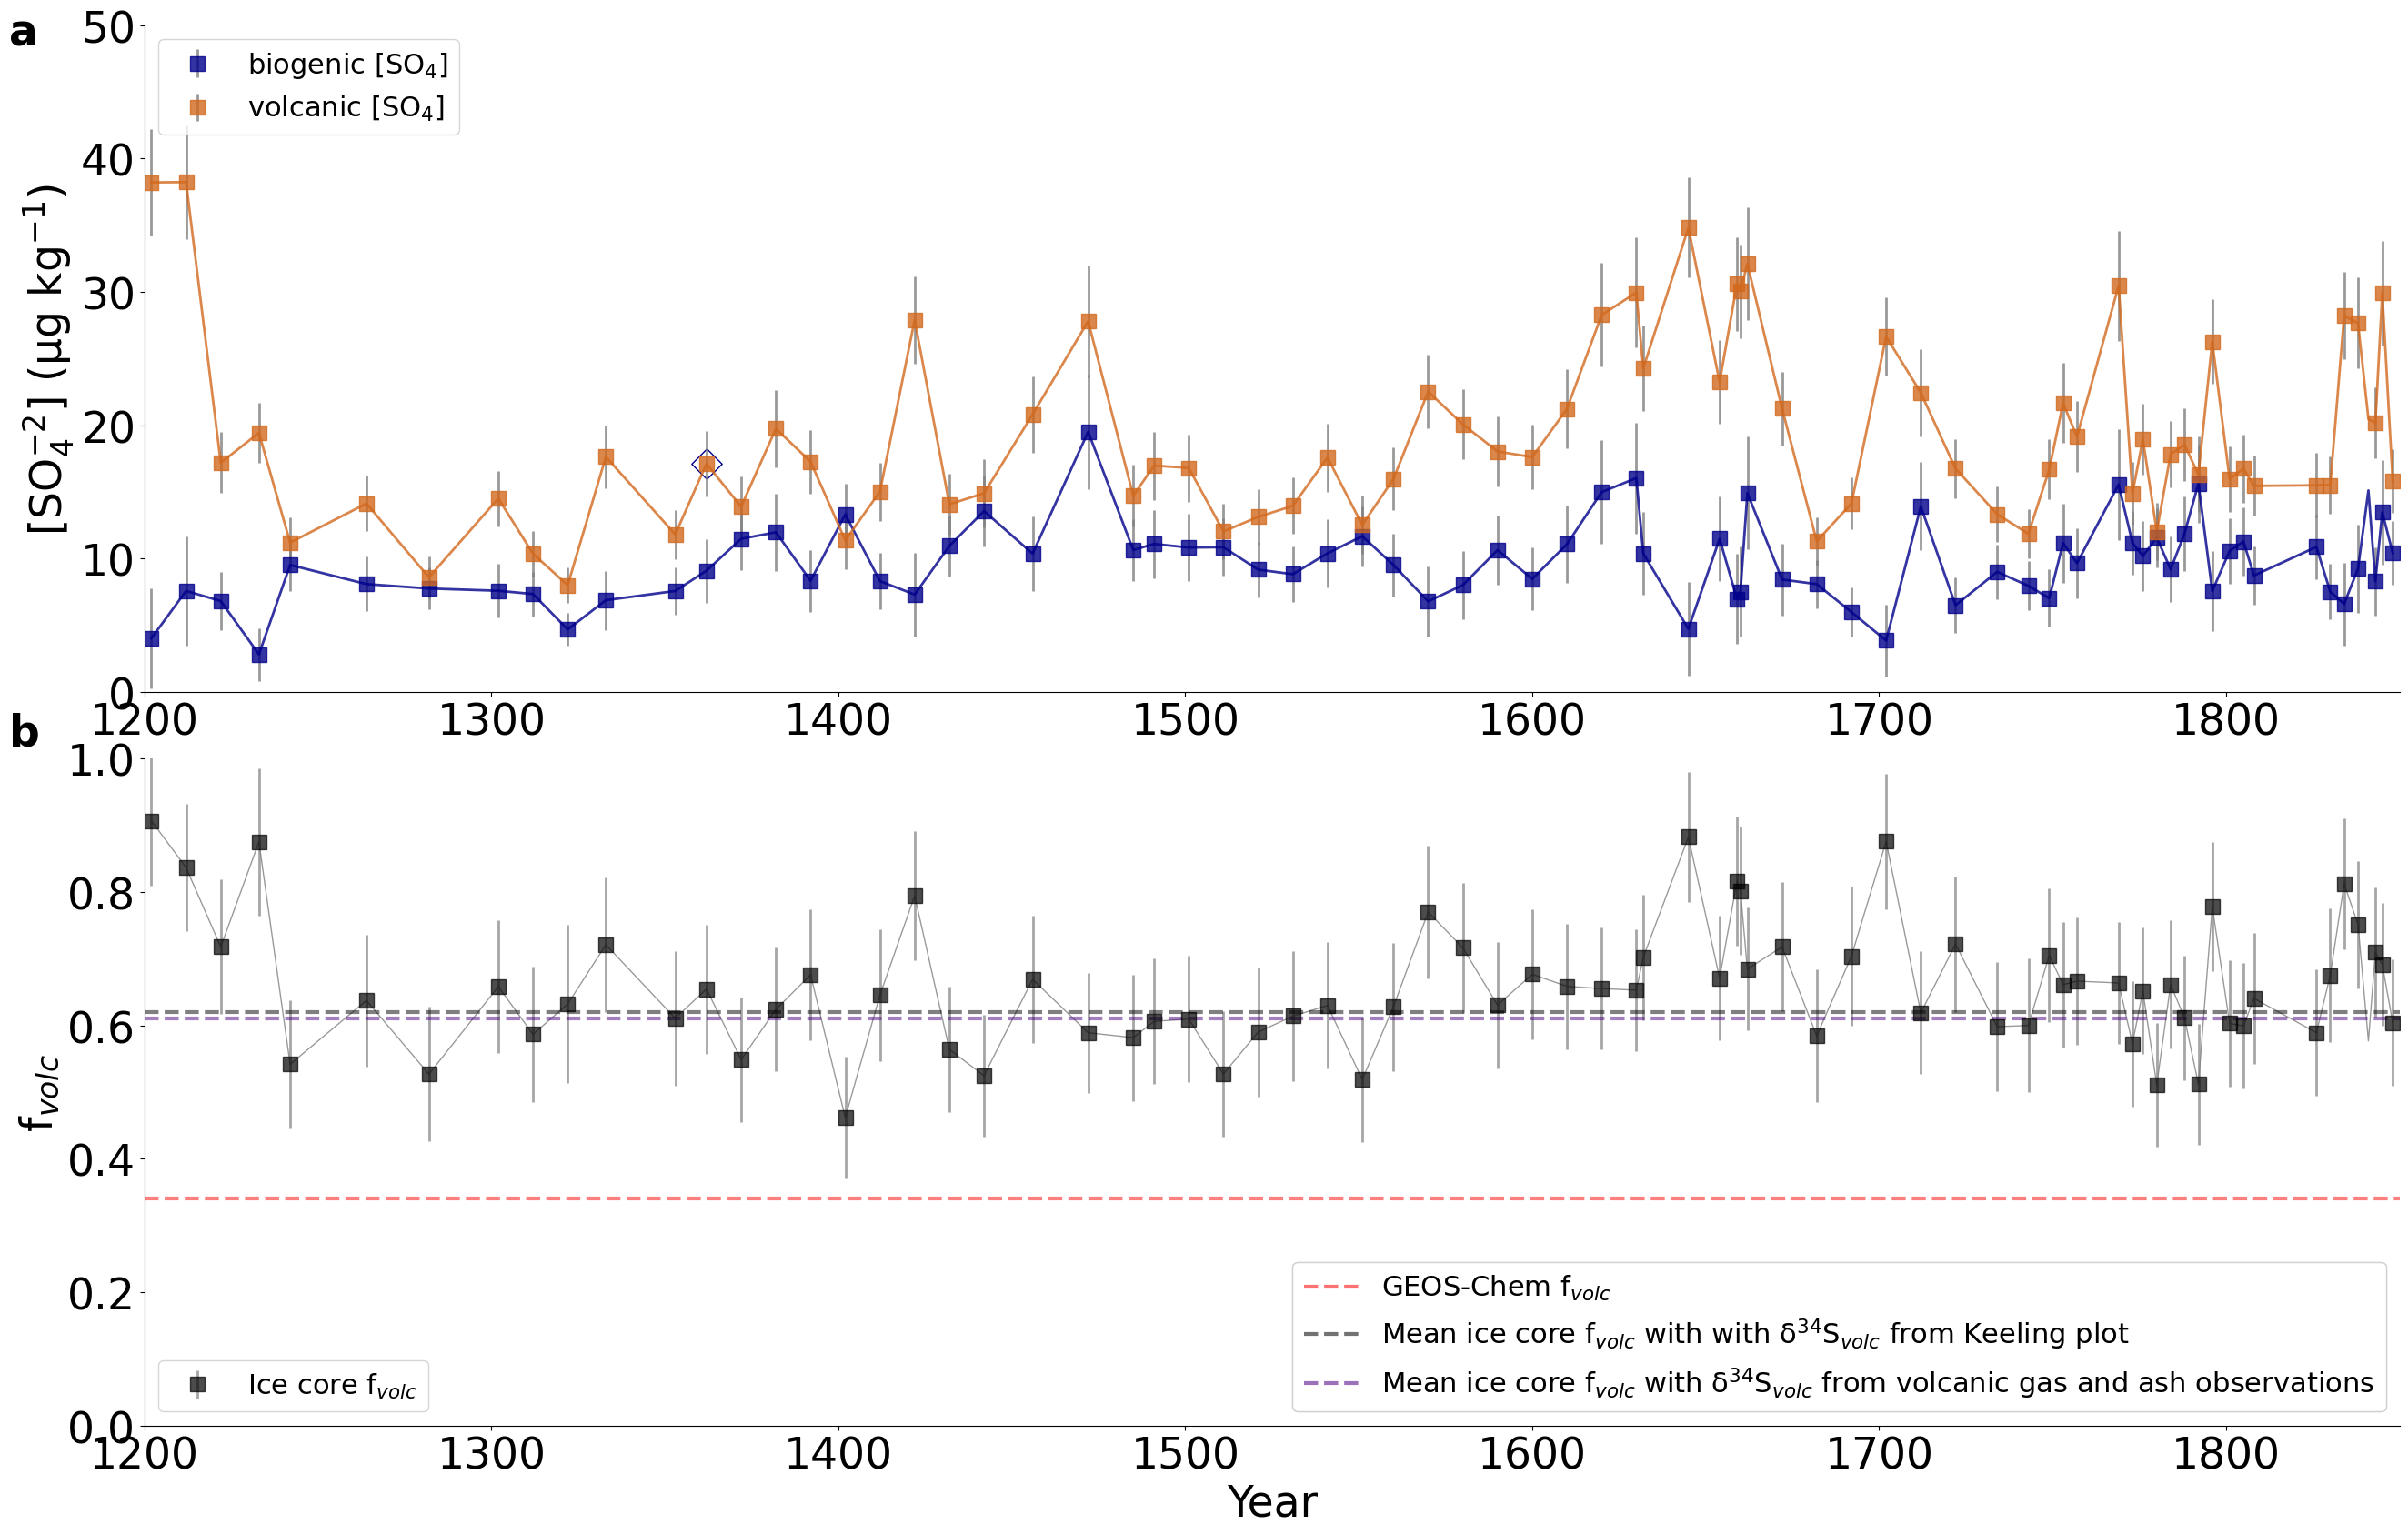

In [74]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=[32,20])
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
j=34

ax[0].set_ylabel('[SO$_4^{-2}$] (µg kg$^{-1}$)',fontsize=j)
ax[1].set_ylabel('f$_{volc}$',fontsize=j)
ax[1].set_xlabel('Year',fontsize=j)
ax[0].set_xlim([1200,1850])
ax[1].set_xlim([1200,1850])
ax[0].set_ylim([0,50])
ax[1].set_ylim([0,1.0])

size = 12
s = 200
line=2
meanline=3
ax[0].errorbar(bioSO4_pre[ice_core.Sample_length==1].index,bioSO4_pre[ice_core.Sample_length==1].values,sigma_bio_pre[ice_core.Sample_length==1],fmt='s',markersize=size,color='darkblue',ecolor='gray',linewidth=line,label='biogenic [SO$_4$]',alpha=0.8)
ax[0].errorbar(bioSO4_pre[ice_core.Sample_length==2].index,bioSO4_pre[ice_core.Sample_length==2].values,sigma_bio_pre[ice_core.Sample_length==2],fmt='s',markersize=size,color='darkblue',ecolor='gray',linewidth=line,alpha=0.8)
ax[0].errorbar(volcSO4_pre[ice_core.Sample_length==1].index,volcSO4_pre[ice_core.Sample_length==1].values,sigma_volc_pre[ice_core.Sample_length==1],fmt='s',markersize=size,color='chocolate',ecolor='gray',linewidth=line,label='volcanic [SO$_4$]',alpha=0.8)
ax[0].errorbar(volcSO4_pre[ice_core.Sample_length==2].index,volcSO4_pre[ice_core.Sample_length==2].values,sigma_volc_pre[ice_core.Sample_length==2],fmt='s',markersize=size,color='chocolate',ecolor='gray',linewidth=line,alpha=0.8)

ax[0].plot(bioSO4_pre.index,bioSO4_pre,color='darkblue',linewidth=line,alpha=0.8)
ax[0].plot(bioSO4_ind.index,bioSO4_ind,color='darkblue',linewidth=line,alpha=0.8)
ax[0].plot(volcSO4_pre.index,volcSO4_pre,color='chocolate',linewidth=line,alpha=0.8)
ax[0].plot(bioSO4_ind.index,volcSO4_ind,color='chocolate',linewidth=line,alpha=0.8)
ax[0].scatter(yr3,concs,marker = 'D',s=size**2*2,color='#FF000000',edgecolor='darkblue')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# ax[0].spines['bottom'].set_visible(False)
# ax[0].axes.get_xaxis().set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].plot(volcSO4_pre.index,volcfracs,color='k',linewidth=1,alpha=0.4)
p1 = ax[1].errorbar(volcSO4_pre[ice_core.Sample_length==2].index,volcfracs[ice_core.Sample_length==2].values,sigma_vf[ice_core.Sample_length==2],lw=line,fmt='s',color='k',ecolor='gray',markersize=size,alpha=0.7,ls='none',label='Ice core f$_{volc}$')
p2 = ax[1].errorbar(volcSO4_pre[ice_core.Sample_length==1].index,volcfracs[ice_core.Sample_length==1].values,sigma_vf[ice_core.Sample_length==1],lw=line,fmt='s',color='k',ecolor='gray',markersize=size,alpha=0.7,ls='none')

# lows = np.zeros(len(d34S_pre))
# middles = np.zeros(len(d34S_pre))
# highs = np.zeros(len(d34S_pre))
# for i in range(0,len(d34S_pre)):
#     lows[i] = np.percentile(fvolc_insitu[i,:,:],0)
#     middles[i] = np.mean(fvolc_insitu[i,:,:])
#     highs[i] = np.percentile(fvolc_insitu[i,:,:],100)
    
# p3 = ax[1].fill_between(d34S_pre.index,lows,highs,color='k',alpha=0.2,label='Ice-core f$_{volc}$ uncertainty with δ$^{34}$S$_V$ from volcanic gas and ash observations')
# ax[1].plot(d34S_pre.index,middles,color='indigo',alpha=0.2,label='Mean ice-core f$_{volc}$ with δ$^{34}$S = 2.6‰')

p4 = ax[1].hlines(0.34, xmin=1200,xmax=1850,color='red',linewidth=meanline,linestyle='--',alpha=0.5,label='GEOS-Chem f$_{volc}$')
p5 = ax[1].hlines(0.62, xmin=1200,xmax=1850,color='k',linewidth=meanline,linestyle='--',alpha=0.5,label='Mean ice core f$_{volc}$ with δ$^{34}$S$_V$ from Keeling plot')
p6 = ax[1].hlines(0.61, xmin=1200,xmax=1850,color='indigo',linewidth=meanline,linestyle='--',alpha=0.5,label='Mean ice core f$_{volc}$ with δ$^{34}$S$_V$ from volcanic gas and ash observations')

ax[0].legend(loc='upper left',fontsize=j-12)
l1 = legend([p1], ['Ice core f$_{volc}$'],loc='lower left',fontsize=j-12)
l2 = legend([p4,p5,p6],['GEOS-Chem f$_{volc}$','Mean ice core f$_{volc}$ with with δ$^{34}$S$_{volc}$ from Keeling plot','Mean ice core f$_{volc}$ with δ$^{34}$S$_{volc}$ from volcanic gas and ash observations'], loc='lower right',fontsize=j-12)
gca().add_artist(l1)
gca().add_artist(l2)


ax[0].tick_params(labelsize= j-5)
ax[1].tick_params(labelsize= j-5)
ax[0].tick_params(labelsize= j-2)
ax[1].tick_params(labelsize= j-2)



for i, label in enumerate(('A', 'B')):
    ax[i].tick_params(labelsize=j)

ax[0].text(-0.06, 1.02, 'a', transform=ax[0].transAxes,fontsize=j, fontweight='bold', va='top')
ax[1].text(-0.06, 1.07, 'b', transform=ax[1].transAxes,fontsize=j, fontweight='bold', va='top')


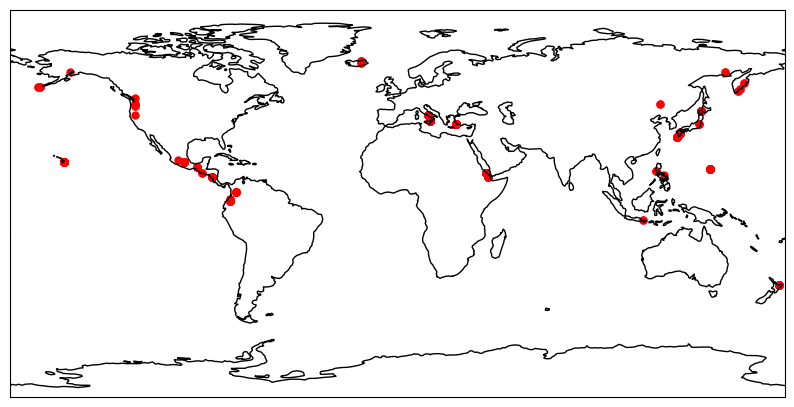

In [75]:
d34Sv_histogram = pd.read_excel('./isotope_signature_data/d34Sv_histogram3.xlsx')

lats = np.round(d34Sv_histogram['Latitude'].values,0)
lons = np.round(d34Sv_histogram['Longitude'].values,0)
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

ax.scatter(lons,lats,marker='.',s=100,color='red')
# ax.scatter(+236,15,marker='.',s=1000,color='purple')
ax.coastlines()




### Responding to Reviewer Comments

In [76]:
mean_d34S = 9.2
fbio = 0.
flow = 0.05
fvolc = 1 - fbio - flow
print('fvolc',fvolc)

d34S_volc = 4.3
d34S_bio = 18.8
d34S_low = -1.5

d34S_volc*fvolc + d34S_bio*fbio + d34S_low*flow

fvolc 0.95


4.01